<a href="https://colab.research.google.com/github/Henil21/Neurova/blob/main/axamine_ai_Neurova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tqdm

In [ ]:
!pip install pandas==1.5.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 70.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.9.0 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.


In [ ]:
!gdown "https://drive.google.com/drive/u/0/my-drive"

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/u/0/my-drive
To: /content/my-drive
703kB [00:00, 9.66MB/s]


In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
#from tqdm.notebook import tqdm
import os
import re
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict

In [ ]:
columns = ["image_id", "caption", "comparison", "indication", "findings", "impression","height","width"]
df = pd.DataFrame(columns = columns)

In [ ]:
len(os.listdir("/content/drive/MyDrive/Dataset/NLMCXR_png"))

7506

In [ ]:
len(os.listdir('/content/drive/MyDrive/Dataset/NLMCXR_reports/ecgen-radiology/'))

30

In [ ]:
for file in tqdm(os.listdir("/content/drive/MyDrive/Dataset/NLMCXR_png/NLMCXR_reports/ecgen-radiology/")):
    if file.endswith(".xml"):
        k = "/content/drive/MyDrive/Dataset/NLMCXR_png/NLMCXR_reports/ecgen-radiology/"
        path = k + file
        mytree = ET.parse(path)# parsing xml report
        comparision = mytree.find(".//AbstractText[@Label='COMPARISON']").text # extracting comaparison text
        indication = mytree.find(".//AbstractText[@Label='INDICATION']").text #extracting indication text
        findings = mytree.find(".//AbstractText[@Label='FINDINGS']").text # extracting findings text
        impression = mytree.find(".//AbstractText[@Label='IMPRESSION']").text  # extracting impression text

        mytree = ET.parse(path)
        for x in mytree.findall("parentImage"):
            image_id = x.attrib['id']+".png"
            filename = '/content/drive/MyDrive/Dataset/NLMCXR_png/' + image_id
            image = cv2.imread(filename) # reading image

            height, width, channels = image.shape
            caption = '' if x.find('caption').text is None else x.find('caption').text

            df = df.append(pd.Series([image_id, caption, comparision, indication, findings, impression,height,width],
                                                         index = columns), ignore_index = True)

  0%|          | 0/3955 [00:00<?, ?it/s]

In [ ]:
df

,image_id,caption,comparison,indication,findings,impression,height,width
0,CXR3679_IM-1831-1001.png,"Chest radiograph, 2 images.",None.,XXXX-year-old chest pain.,Normal heart. Clear lungs. No pneumothorax. No...,Normal chest exam.,624,512
1,CXR3679_IM-1831-2001.png,"Chest radiograph, 2 images.",None.,XXXX-year-old chest pain.,Normal heart. Clear lungs. No pneumothorax. No...,Normal chest exam.,624,512
2,CXR3665_IM-1823-1001.png,"Chest radiographs, 2 XXXX and lateral",None.,"XXXX-year-old woman, positive PPD.",Heart size within normal limits. Negative for ...,1. No acute abnormality. 2. No evidence of pul...,420,512
3,CXR3665_IM-1823-2001.png,"Chest radiographs, 2 XXXX and lateral",None.,"XXXX-year-old woman, positive PPD.",Heart size within normal limits. Negative for ...,1. No acute abnormality. 2. No evidence of pul...,624,512
4,CXR3667_IM-1824-2001.png,"PA and lateral views of the chest, XXXX, XXXX ...",None,INDICATION: HYPERTENSION;,Density in the left upper lung on PA XXXX XXXX...,1. Irregular density in the left upper lung on...,512,512
...,...,...,...,...,...,...,...,...
7465,CXR1871_IM-0564-2001.png,"2 views chest, XXXX hours, XXXX, XXXX",XXXX,XXXX,The cardiomediastinal contours are within norm...,No acute cardiopulmonary abnormality.,624,512
7466,CXR1860_IM-0558-1001.png,"PA and lateral chest radiograph, XXXX at XXXX ...",None.,"XXXX-year-old female, bone marrow transplant w...",The cardiac and mediastinal silhouettes are no...,1. No evidence of acute cardiopulmonary proces...,512,512
7467,CXR1860_IM-0558-2001.png,"PA and lateral chest radiograph, XXXX at XXXX ...",None.,"XXXX-year-old female, bone marrow transplant w...",The cardiac and mediastinal silhouettes are no...,1. No evidence of acute cardiopulmonary proces...,512,512
7468,CXR1844_IM-0547-1001.png,"Chest x-XXXX, 2 views, XXXX, XXXX XXXX PM",none,Syncope,Normal cardiomediastinal contours. Hyperexpans...,No cardiopulmonary abnormality.,512,512


In [ ]:
def absolute_path(x):
    '''Makes the path absolute '''
    x = '/content/drive/MyDrive/Dataset/NLMCXR_png/'+ x
    return x

df['Image_path'] = df['image_id'].apply(lambda x : absolute_path(x)) # making the paths absolute

In [ ]:
df.head(5)

,image_id,caption,comparison,indication,findings,impression,height,width,Image_path
0,CXR3679_IM-1831-1001.png,"Chest radiograph, 2 images.",None.,XXXX-year-old chest pain.,Normal heart. Clear lungs. No pneumothorax. No...,Normal chest exam.,624,512,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...
1,CXR3679_IM-1831-2001.png,"Chest radiograph, 2 images.",None.,XXXX-year-old chest pain.,Normal heart. Clear lungs. No pneumothorax. No...,Normal chest exam.,624,512,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...
2,CXR3665_IM-1823-1001.png,"Chest radiographs, 2 XXXX and lateral",None.,"XXXX-year-old woman, positive PPD.",Heart size within normal limits. Negative for ...,1. No acute abnormality. 2. No evidence of pul...,420,512,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...
3,CXR3665_IM-1823-2001.png,"Chest radiographs, 2 XXXX and lateral",None.,"XXXX-year-old woman, positive PPD.",Heart size within normal limits. Negative for ...,1. No acute abnormality. 2. No evidence of pul...,624,512,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...
4,CXR3667_IM-1824-2001.png,"PA and lateral views of the chest, XXXX, XXXX ...",None,INDICATION: HYPERTENSION;,Density in the left upper lung on PA XXXX XXXX...,1. Irregular density in the left upper lung on...,512,512,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...


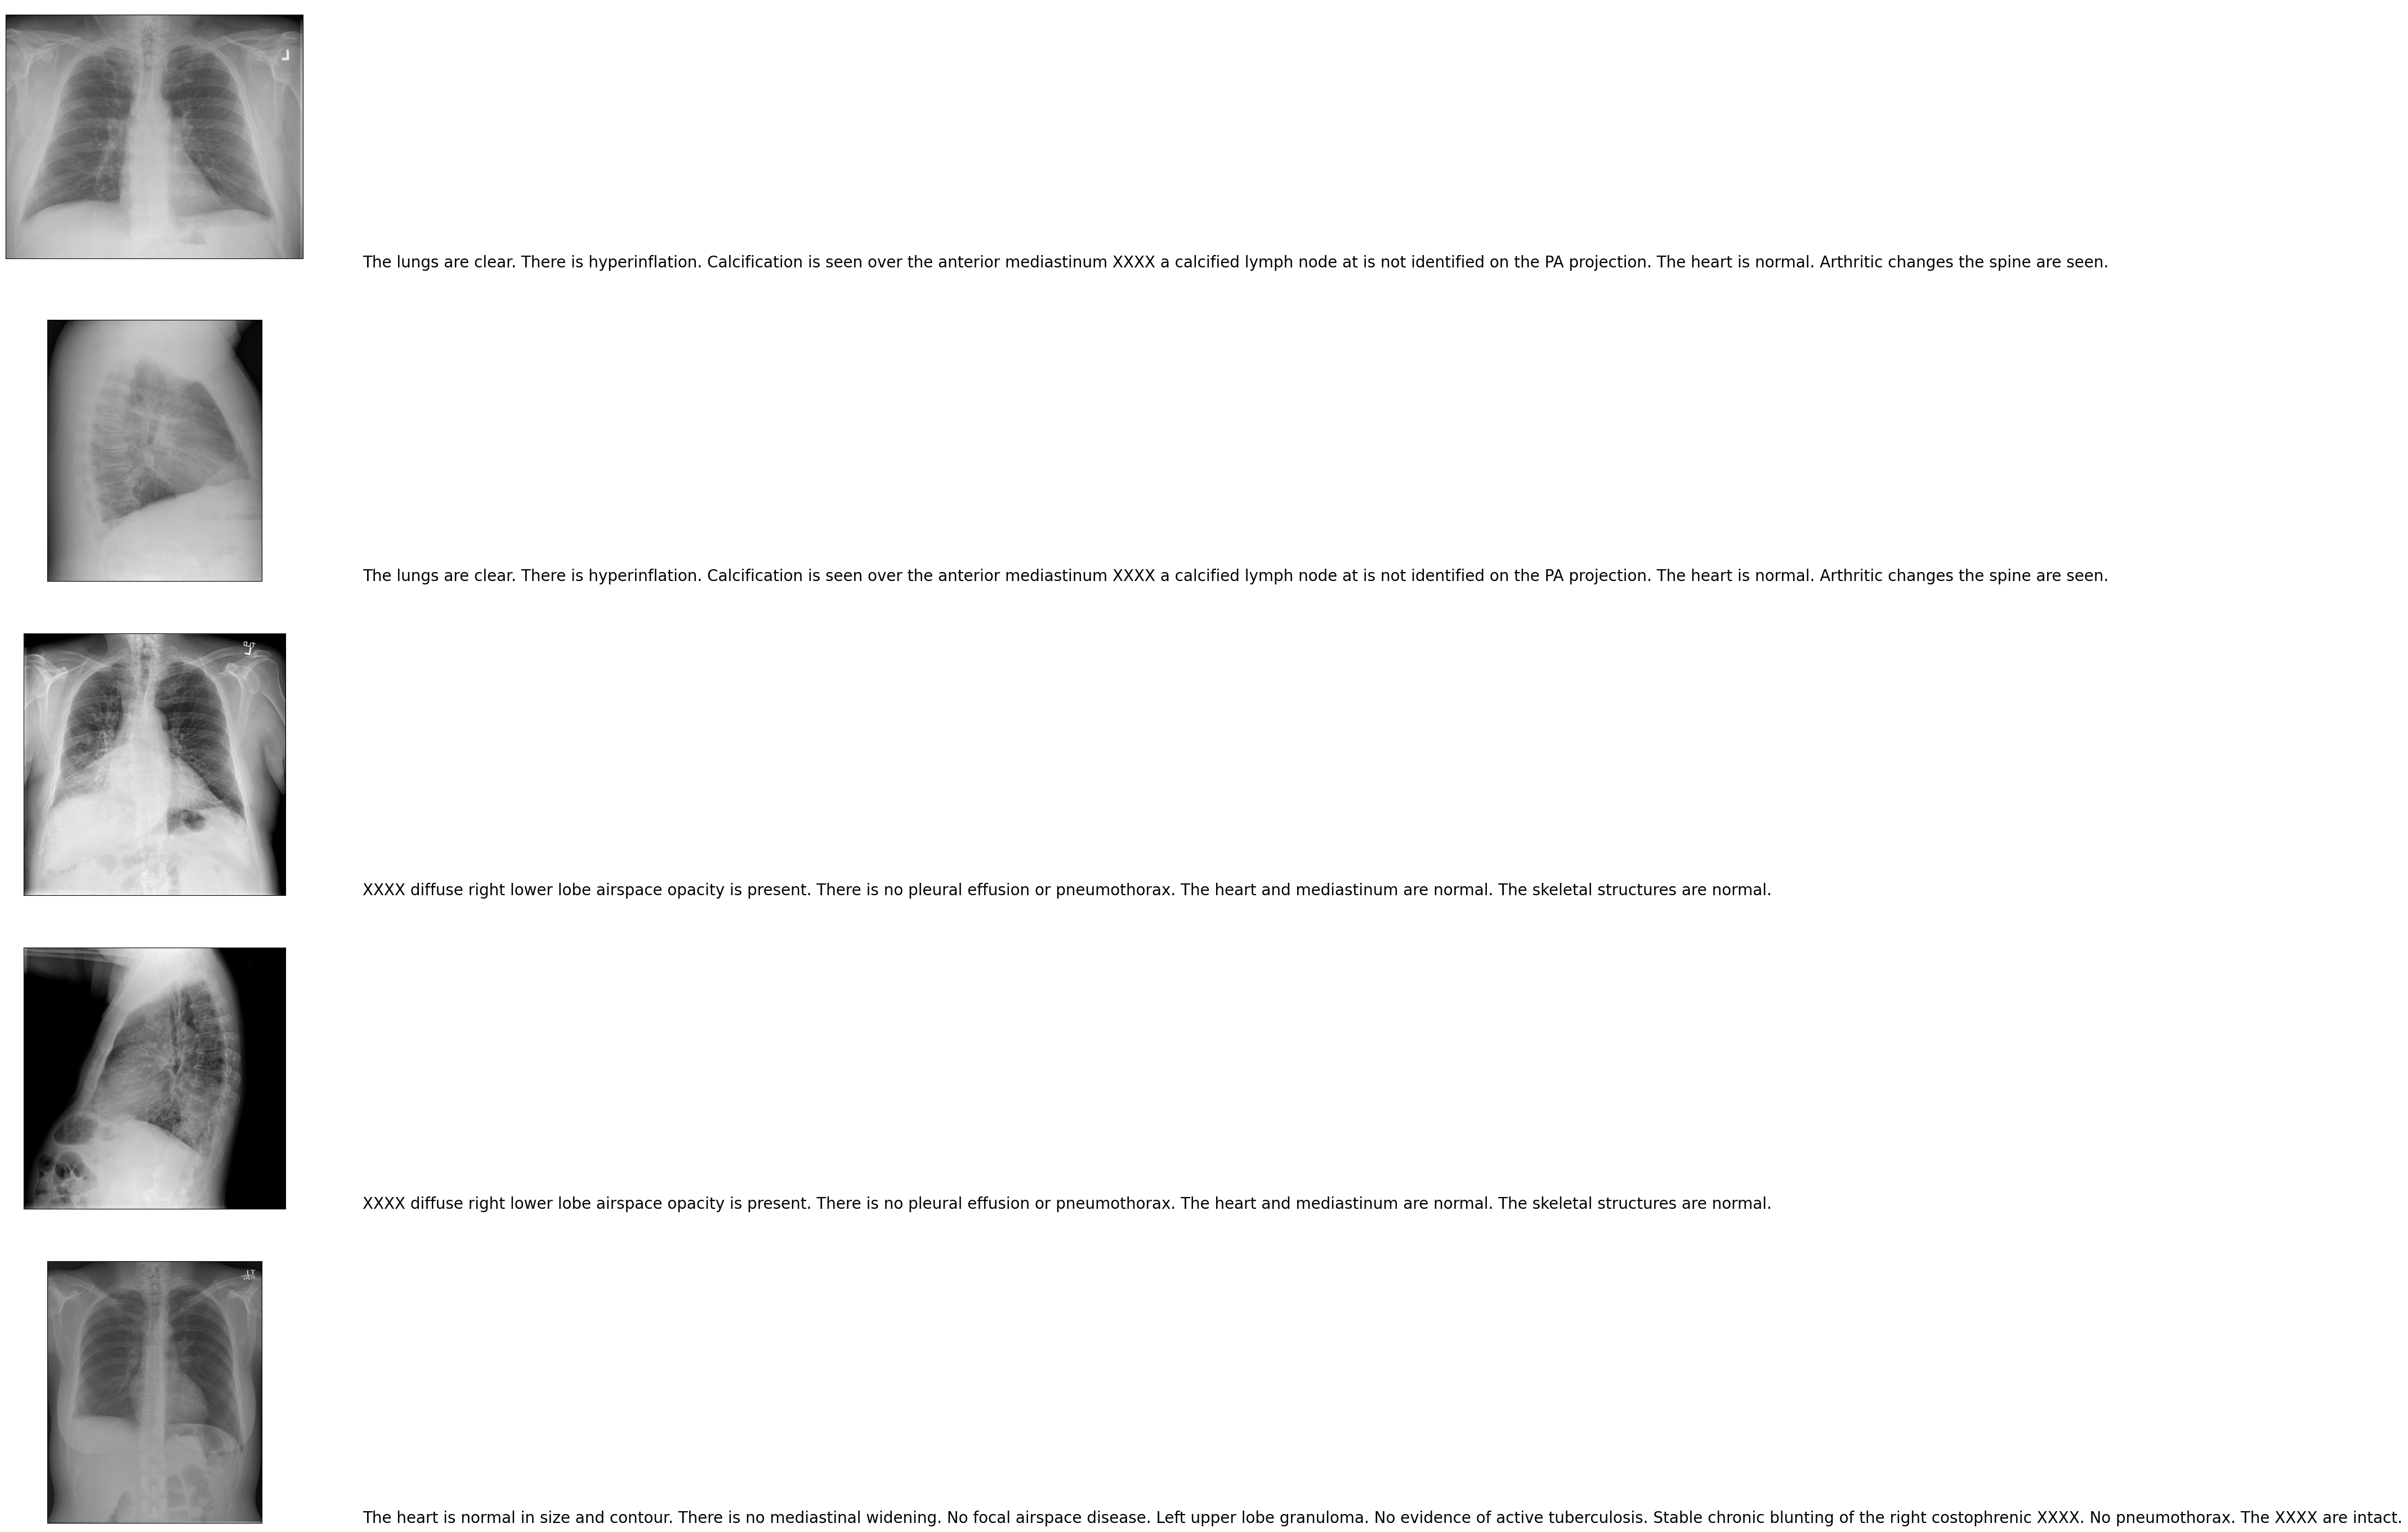

In [ ]:
count = 1
fig = plt.figure(figsize=(15,35))

for filename in df['Image_path'].values[95:100]:
    findings = list(df["findings"].loc[df["Image_path"] == filename].values)
    img = cv2.imread(filename)
    ax = fig.add_subplot(5, 2 , count , xticks=[], yticks=[])
    ax.imshow(img)
    count += 1
    ax = fig.add_subplot(5 ,2 ,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0, len(findings))
    for i, f in enumerate(findings):
        ax.text(0,i,f,fontsize=20)
    count += 1
plt.show()

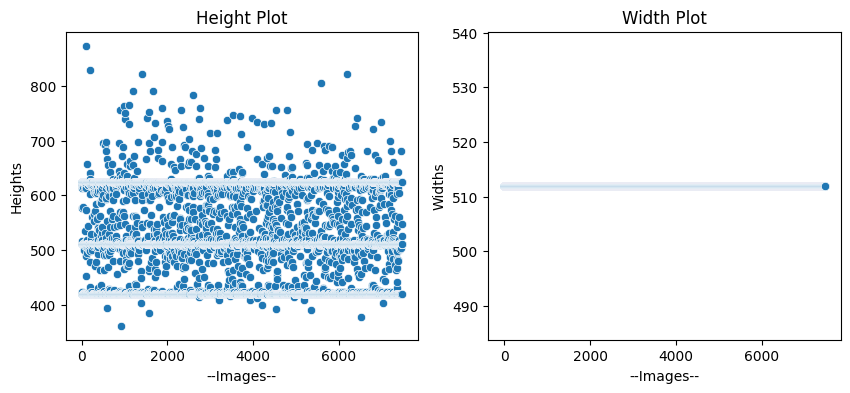

In [ ]:
plt.figure(figsize=(10,4))

# Height Plot
plt.subplot(121)
plt.title('Height Plot')
plt.ylabel('Heights')
plt.xlabel('--Images--')
sns.scatterplot(x=range(len(df.height.values)), y=df.height.values)

# Width Plot
plt.subplot(122)
plt.title('Width Plot')
plt.ylabel('Widths')
plt.xlabel('--Images--')
sns.scatterplot(x=range(len(df.width.values)), y=df.width.values)

plt.show()


In [ ]:
# number of missing values
df.isnull().sum()

,0
image_id,0
caption,0
comparison,1157
indication,159
findings,997
impression,52
height,0
width,0
Image_path,0


In [ ]:
data = df[['image_id','findings','height','width','Image_path']]

In [ ]:
data.shape

(7470, 5)

In [ ]:
data.isnull().sum()

,0
image_id,0
findings,997
height,0
width,0
Image_path,0


In [ ]:
data = data.dropna(axis=0)

In [ ]:
data.isnull().sum()

,0
image_id,0
findings,0
height,0
width,0
Image_path,0


'The lungs are hypoventilated. There is no focal airspace opacity. The cardiomediastinal silhouette is normal in size. There is no pneumothorax or large pleural effusion.'

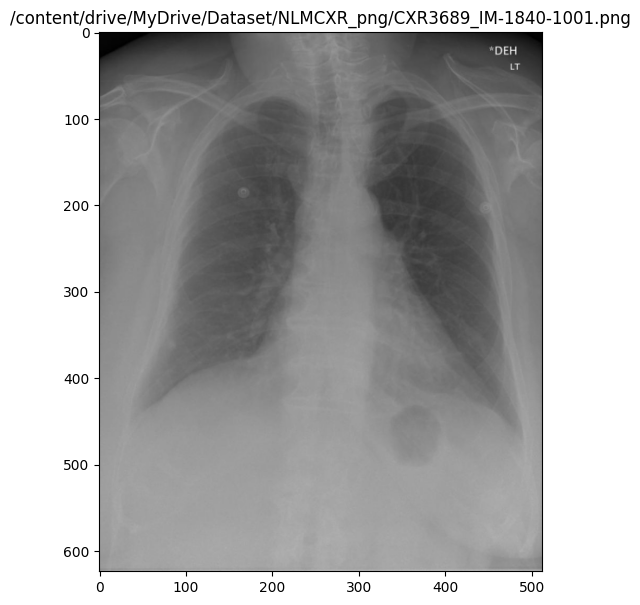

In [ ]:
plt.figure(figsize=(8,7))
img = cv2.imread(data['Image_path'].values[5])
plt.imshow(img)
plt.title(data['Image_path'].values[5])

data['findings'].values[7]

In [ ]:
data.Image_path

,Image_path
0,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...
1,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...
2,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...
3,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...
4,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...
...,...
7465,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1...
7466,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1...
7467,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1...
7468,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1...


In [ ]:
images = {}
findings = {}

for img,fin in data[['Image_path','findings']].values:
    a = img.split('.')
    file_type = a[-1]
    a = a[0].split('-')
    a.pop(len(a)-1)
    a = ('-'.join(e for e in a))
    if a not in images.keys():
        images[a] = 1
        findings[a] = fin
    else:
        images[a] += 1
        findings[a] = fin

In [ ]:
images['/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1001_IM-0004'],findings['/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1001_IM-0004']

(2,
 'Interstitial markings are diffusely prominent throughout both lungs. Heart size is normal. Pulmonary XXXX normal.')

In [ ]:
print('Total Number of Unique_IDs :', len(images.keys()))

Total Number of Unique_IDs : 3350


<Axes: title={'center': 'Number of Images  per patients'}, ylabel='count'>

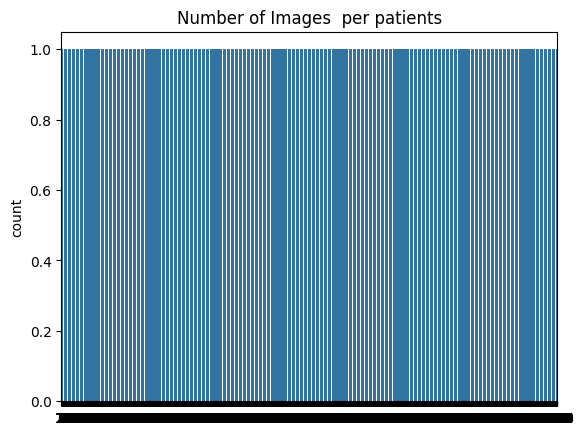

In [ ]:
plt.title('Number of Images  per patients')
sns.countplot(list(images.values()))

In [ ]:
def train_test_split(data):
    persons = list(data.keys())
    persons_train = persons[:2500]
    persons_cv = persons[2500:3000]
    persons_test = persons[3000:3350]
    return persons_train, persons_cv, persons_test

images_train, images_cv, images_test = train_test_split(images)

In [ ]:
def combining_images(image_set):

    image_per_person = defaultdict(list)  # creating a list of dictionary to store all the image paths
                                            #corresponding to a person_id
    for pid in image_set:
        for img in data['Image_path'].values:
            if pid in img:
                image_per_person[pid].append(img)
            else:
                continue
    return image_per_person

In [ ]:
img_per_person_train = combining_images(images_train)
img_per_person_cv = combining_images(images_cv)
img_per_person_test = combining_images(images_test)

In [ ]:
img_per_person_train['/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1001_IM-0004']

[]

In [ ]:
def load_image(file):
    img = cv2.imread(file)
    return img

In [ ]:
# just checking the ID which has 4 images
for k,v in images.items():
    if v == 4:
        print(k)
        break

/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3932_IM-2004


Text(0.5, 1.0, '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1102_IM-0069-4004.png')

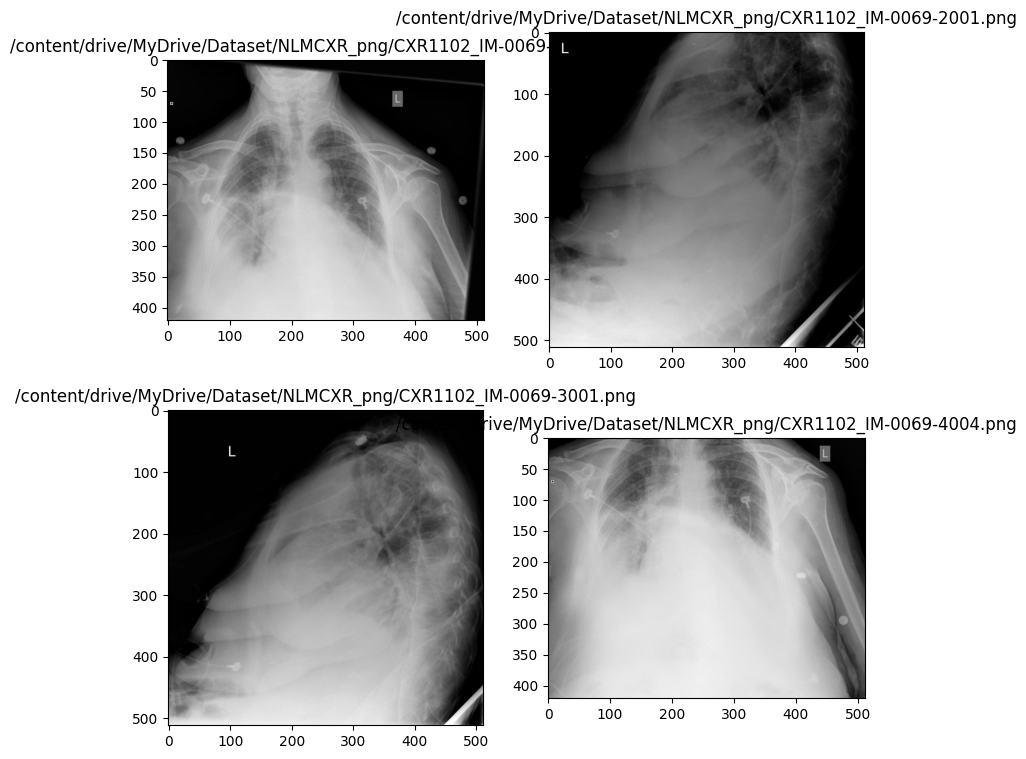

In [ ]:
plt.figure(figsize=(9,9))
plt.subplot(221)
plt.imshow(load_image('/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1102_IM-0069-12012.png'))
plt.title('/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1102_IM-0069-12012.png')
plt.subplot(222)
plt.imshow(load_image('/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1102_IM-0069-2001.png'))
plt.title('/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1102_IM-0069-2001.png')
plt.subplot(223)
plt.imshow(load_image('/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1102_IM-0069-3001.png'))
plt.title('/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1102_IM-0069-3001.png')
plt.subplot(224)
plt.imshow(load_image('/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1102_IM-0069-4004.png'))
plt.title('/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1102_IM-0069-4004.png')

In [ ]:
import itertools

def create_data(image_per_person):
    # new dataset
    person_id, image1, image2, report = [],[],[],[]
    for pid, imgs in image_per_person.items():   #contains pid and the images associated with that pid

        if len(imgs) == 1:
            image1.append(imgs[0])
            image2.append(imgs[0])
            person_id.append(pid)
            report.append(findings[pid])
        else:
            num = 0
            a = itertools.combinations(imgs, 2)
            for i in a:
                image1.append(i[0])
                image2.append(i[1])
                person_id.append(pid + '_' + str(num))
                report.append(findings[pid])
                num += 1
    data = pd.DataFrame()
    data['Person_id'] = person_id
    data['Image1'] = image1
    data['Image2'] = image2
    data['Report'] = report

    return data
train = create_data(img_per_person_train)
test = create_data(img_per_person_test)
cv = create_data(img_per_person_cv)
train.head()


,Person_id,Image1,Image2,Report
0,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,Normal heart. Clear lungs. No pneumothorax. No...
1,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,Heart size within normal limits. Negative for ...
2,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,Density in the left upper lung on PA XXXX XXXX...
3,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,Normal heart size and mediastinal contours. Ca...
4,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,The lungs are hypoventilated. There is no foca...


In [ ]:
train.to_csv('train.csv')
test.to_csv('test.csv')
cv.to_csv('cv.csv')

In [ ]:
def lowercase(text):
    '''Converts to lowercase'''
    new_text = []
    for line in text:
        new_text.append(line.lower())
    return new_text

def decontractions(text):
    '''Performs decontractions in the doc'''
    new_text = []
    for phrase in text:
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"couldn\'t", "could not", phrase)
        phrase = re.sub(r"shouldn\'t", "should not", phrase)
        phrase = re.sub(r"wouldn\'t", "would not", phrase)
        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r"\*+", "abuse", phrase)
        new_text.append(phrase)

    return new_text

def rem_punctuations(text):
    '''Removes punctuations'''
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*~''' # full stop is not removed
    new_text = []
    for line in text:
        for char in line:
            if char in punctuations:
                line = line.replace(char, "")
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def rem_numbers(text):
    '''Removes numbers and irrelevant text like xxxx*'''
    new_text = []
    for line in text:
        temp = re.sub(r'x*','',line)
        new_text.append(re.sub(r'\d','',temp))
    return new_text

def words_filter(text):
    '''Removes words less than 2 characters except no and ct'''
    new_text = []
    for line in text:
        temp = line.split()
        temp2 = []
        for word in temp:
            if  len(word) <=2 and word != 'no' and word != 'ct':
                continue
            else:
                temp2.append(word)
        new_text.append(' '.join(e for e in temp2))
    return new_text

def multiple_fullstops(text):
    ''' Removes multiple full stops from the text'''
    new_text = []
    for line in text:
        new_text.append(re.sub(r'\.\.+', '.', line))
    return new_text

def fullstops(text):
    new_text = []
    for line in text:
        new_text.append(re.sub('\.', ' .', line))
    return new_text

def multiple_spaces(text):
    new_text = []
    for line in text:
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def separting_startg_words(text):
    new_text = []
    for line in text:
        temp = []
        words = line.split()
        for i in words:
            if i.startswith('.') == False:
                temp.append(i)
            else:
                w = i.replace('.','. ')
                temp.append(w)
        new_text.append(' '.join(e for e in temp))
    return new_text

def rem_apostrophes(text):
    new_text = []
    for line in text:
        new_text.append(re.sub("'",'',line))
    return new_text
def text_preprocessing(text):
    '''Combines all the preprocess functions'''
    new_text = lowercase(text)
    new_text = decontractions(new_text)
    new_text = rem_punctuations(new_text)
    new_text = rem_numbers(new_text)
    new_text = words_filter(new_text)
    new_text = multiple_fullstops(new_text)
    new_text = fullstops(new_text)
    new_text = multiple_spaces(new_text)
    new_text = separting_startg_words(new_text)
    new_text = rem_apostrophes(new_text)
    return new_text
train['Report'] = text_preprocessing(train['Report'])
test['Report'] = text_preprocessing(test['Report'])
cv['Report'] = text_preprocessing(cv['Report'])
train

,Person_id,Image1,Image2,Report
0,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,normal heart . clear lungs . no pneumothora ...
1,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,heart size within normal limits . negative fo...
2,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,density the left upper lung represents superim...
3,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,normal heart size and mediastinal contours . ...
4,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR3...,the lungs are hypoventilated . there no focal...
...,...,...,...,...
2776,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,the lungs are clear . the cardiomediastinal s...
2777,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,normal and stable cardiomediastinal contours ....
2778,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,no pneumothora pleural effusion focal airspace...
2779,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,the heart normal size and contour . there no ...


In [ ]:
train.to_csv('processed_train.csv')
test.to_csv('processed_test.csv')
cv.to_csv('processed_cv.csv')

In [ ]:
l = [len(e.split()) for e in train['Report'].values]  # Number of words in each report
print('maximum word in a report is :',max(l))

maximum word in a report is : 153


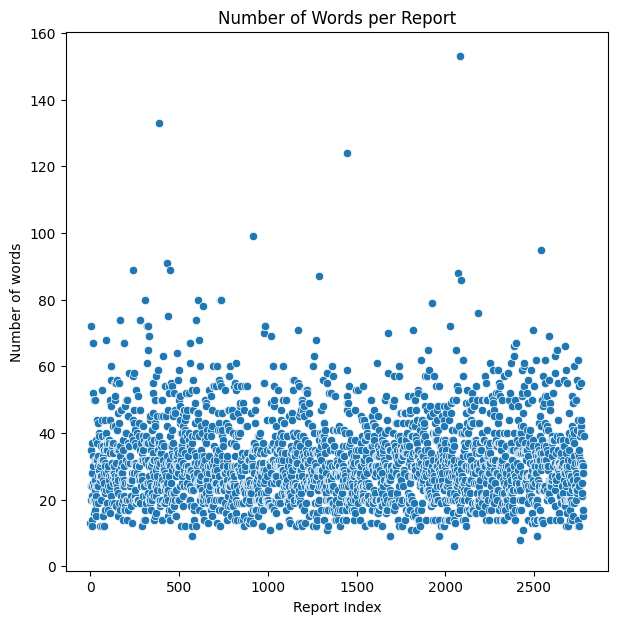

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming l is the list of word counts per report
# Assuming train.shape[0] is the number of reports

plt.figure(figsize=(7, 7))
plt.title('Number of Words per Report')
sns.scatterplot(x=range(train.shape[0]), y=l)
plt.xlabel('Report Index')
plt.ylabel('Number of words')
plt.show()


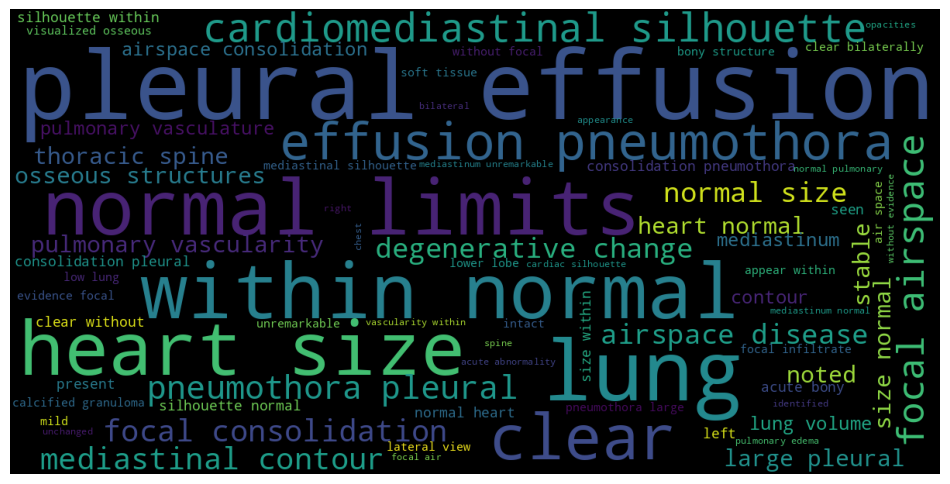

In [ ]:
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',max_words=800,max_font_size=60,scale=3,random_state=1 ).generate(' '.join(data.astype(str)))

    fig = plt.figure(1, figsize=(12, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train['Report'])

<Axes: title={'center': 'Words for each findings review'}>

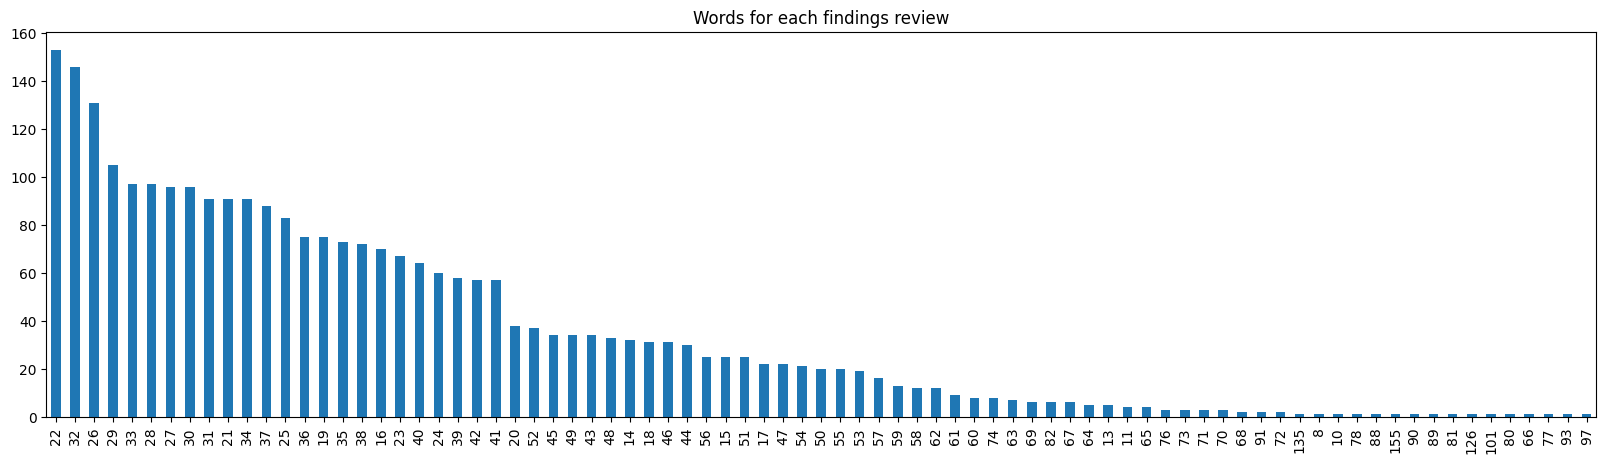

In [ ]:
countword = train['Report'].str.split().apply(len).value_counts()
countword[:].plot(kind='bar',figsize=(20,5) , title = 'Words for each findings review')

In [ ]:
def remodelling(x):
    '''adds start and end tokens to a sentence '''
    return 'startseq' + ' ' + x + ' ' + 'endseq'
train['Report'] = train['Report'].apply(lambda x : remodelling(x))
test['Report'] = test['Report'].apply(lambda x : remodelling(x))
cv['Report'] = cv['Report'].apply(lambda x : remodelling(x))

In [ ]:
# save the cleaned data(STRUCTURED DATA)
train.to_csv('Final_Train_Data.csv', index=False)
test.to_csv('Final_Test_Data.csv', index=False)
cv.to_csv('Final_CV_Data.csv', index=False)



---

---



In [2]:
import tensorflow as tf
from tensorflow.keras.applications import densenet
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import cv2
import tensorflow as tf
import re
import pickle
from PIL import Image
from skimage.transform import resize
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Conv2D, Concatenate, Flatten, Add, Dropout, GRU
import random
import datetime
from nltk.translate.bleu_score import sentence_bleu

In [8]:
train_data = pd.read_csv('/content/drive/MyDrive/Dataset/Final_CV_Data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Dataset/Final_Test_Data.csv')
cv_data = pd.read_csv('/content/drive/MyDrive/Dataset/Final_CV_Data.csv')

In [9]:
print('train data shape : ',train_data.shape)
train_data.head(2)

train data shape :  (551, 4)


,Person_id,Image1,Image2,Report
0,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,startseq cardiomediastinal silhouettes are wit...
1,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,startseq normal heart size and mediastinal con...


In [10]:
print('CV data shape : ',cv_data.shape)
cv_data.head(2)

CV data shape :  (551, 4)


,Person_id,Image1,Image2,Report
0,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,startseq cardiomediastinal silhouettes are wit...
1,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2...,startseq normal heart size and mediastinal con...


In [11]:
chexNet = densenet.DenseNet121(include_top=False, weights = None,   input_shape=(224,224,3), pooling="avg")
X = chexNet.output
X = Dense(14, activation="sigmoid", name="predictions")(X)
model = Model(inputs=chexNet.input, outputs=X)

In [12]:

model.load_weights('/content/drive/MyDrive/Dataset/brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

In [13]:
chexNet = Model(inputs = model.input, outputs = model.layers[-2].output)

In [14]:
def load_image(img_name):
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224,224,3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    return X

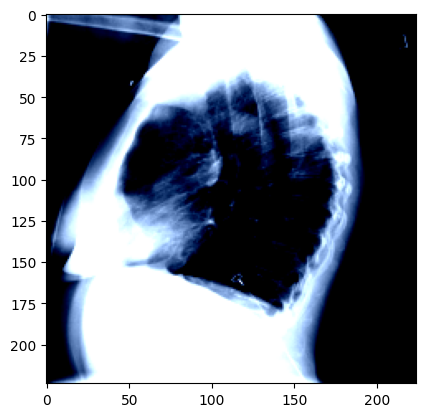

In [15]:
img = load_image('/content/drive/MyDrive/Dataset/NLMCXR_png/CXR1082_IM-0058-1001.png')
plt.imshow(img[0])
img = load_image('/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2828_IM-1247-2001.png')
plt.imshow(img[0])

In [16]:
Xnet_features = {}
for key, img1, img2, finding in tqdm(train_data.values):
    i1 = load_image(img1)
    img1_features = chexNet.predict(i1)
    i2 = load_image(img2)
    img2_features = chexNet.predict(i2)
    input_ = np.concatenate((img1_features, img2_features), axis=1)
    Xnet_features[key] = input_

for key, img1, img2, finding in tqdm(test_data.values):
    i1 = load_image(img1)
    img1_features = chexNet.predict(i1)
    i2 = load_image(img2)
    img2_features = chexNet.predict(i2)
    input_ = np.concatenate((img1_features, img2_features), axis=1)
    Xnet_features[key] = input_

for key, img1, img2, finding in tqdm(cv_data.values):
    i1 = load_image(img1)
    img1_features = chexNet.predict(i1)
    i2 = load_image(img2)
    img2_features = chexNet.predict(i2)
    input_ = np.concatenate((img1_features, img2_features), axis=1)
    Xnet_features[key] = input_

  0%|          | 0/551 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  0%|          | 1/551 [00:06<1:01:51,  6.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  0%|          | 2/551 [00:08<33:52,  3.70s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


  1%|          | 3/551 [00:09<23:19,  2.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


  1%|          | 4/551 [00:10<17:11,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


  1%|          | 5/551 [00:11<14:34,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  1%|          | 6/551 [00:13<14:23,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  1%|▏         | 7/551 [00:14<13:32,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  1%|▏         | 8/551 [00:15<13:00,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  2%|▏         | 9/551 [00:17<14:14,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  2%|▏         | 10/551 [00:19<14:29,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  2%|▏         | 11/551 [00:20<13:36,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


  2%|▏         | 12/551 [00:22<15:20,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


  2%|▏         | 13/551 [00:24<14:51,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


  3%|▎         | 14/551 [00:25<14:14,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  3%|▎         | 15/551 [00:27<14:25,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  3%|▎         | 16/551 [00:28<14:12,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  3%|▎         | 17/551 [00:30<13:03,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|▎         | 18/551 [00:31<12:44,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


  3%|▎         | 19/551 [00:32<12:47,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  4%|▎         | 20/551 [00:34<13:23,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|▍         | 21/551 [00:36<15:28,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


  4%|▍         | 22/551 [00:38<15:19,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


  4%|▍         | 23/551 [00:40<14:48,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  4%|▍         | 24/551 [00:41<14:37,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


  5%|▍         | 25/551 [00:43<14:00,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|▍         | 26/551 [00:44<13:23,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  5%|▍         | 27/551 [00:45<12:46,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  5%|▌         | 28/551 [00:47<12:56,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  5%|▌         | 29/551 [00:48<13:16,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  5%|▌         | 30/551 [00:50<12:52,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


  6%|▌         | 31/551 [00:52<13:26,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


  6%|▌         | 32/551 [00:54<14:30,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


  6%|▌         | 33/551 [00:55<13:46,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  6%|▌         | 34/551 [00:57<13:48,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


  6%|▋         | 35/551 [00:58<13:39,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  7%|▋         | 36/551 [01:00<14:16,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  7%|▋         | 37/551 [01:01<13:35,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  7%|▋         | 38/551 [01:03<13:28,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


  7%|▋         | 39/551 [01:04<13:10,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


  7%|▋         | 40/551 [01:06<13:05,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step


  7%|▋         | 41/551 [01:08<15:27,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


  8%|▊         | 42/551 [01:10<15:43,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


  8%|▊         | 43/551 [01:12<13:59,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  8%|▊         | 44/551 [01:13<13:21,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  8%|▊         | 45/551 [01:14<13:11,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  8%|▊         | 46/551 [01:16<12:44,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  9%|▊         | 47/551 [01:17<11:03,  1.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  9%|▊         | 48/551 [01:18<12:04,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


  9%|▉         | 49/551 [01:20<12:39,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


  9%|▉         | 50/551 [01:22<12:35,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  9%|▉         | 51/551 [01:23<13:13,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  9%|▉         | 52/551 [01:25<14:00,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 10%|▉         | 53/551 [01:26<11:40,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 10%|▉         | 54/551 [01:28<11:57,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 10%|▉         | 55/551 [01:29<12:04,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 10%|█         | 56/551 [01:30<11:44,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 10%|█         | 57/551 [01:32<12:19,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 11%|█         | 58/551 [01:35<14:39,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 11%|█         | 59/551 [01:37<15:34,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 11%|█         | 60/551 [01:38<13:55,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 11%|█         | 61/551 [01:40<14:03,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 11%|█▏        | 62/551 [01:41<13:24,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 11%|█▏        | 63/551 [01:42<12:02,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 12%|█▏        | 64/551 [01:44<12:29,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 12%|█▏        | 65/551 [01:45<10:43,  1.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 12%|█▏        | 66/551 [01:46<10:15,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 12%|█▏        | 67/551 [01:48<11:20,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 12%|█▏        | 68/551 [01:49<11:46,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 13%|█▎        | 69/551 [01:51<12:16,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 13%|█▎        | 70/551 [01:52<11:38,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 13%|█▎        | 71/551 [01:54<11:39,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 13%|█▎        | 72/551 [01:55<10:59,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 13%|█▎        | 73/551 [01:57<11:42,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 13%|█▎        | 74/551 [01:58<11:37,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 14%|█▎        | 75/551 [01:59<11:37,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 14%|█▍        | 76/551 [02:02<13:36,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 14%|█▍        | 77/551 [02:03<13:19,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 14%|█▍        | 78/551 [02:05<13:02,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 14%|█▍        | 79/551 [02:06<12:27,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 15%|█▍        | 80/551 [02:08<12:44,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 15%|█▍        | 81/551 [02:09<11:14,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 15%|█▍        | 82/551 [02:10<09:30,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 15%|█▌        | 83/551 [02:11<09:23,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 15%|█▌        | 84/551 [02:12<09:45,  1.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 15%|█▌        | 85/551 [02:14<10:09,  1.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


 16%|█▌        | 86/551 [02:16<12:03,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step    


 16%|█▌        | 87/551 [02:19<15:40,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


 16%|█▌        | 88/551 [02:24<21:25,  2.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


 16%|█▌        | 89/551 [02:26<21:36,  2.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 16%|█▋        | 90/551 [02:29<21:25,  2.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 17%|█▋        | 91/551 [02:31<19:47,  2.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 17%|█▋        | 92/551 [02:34<19:51,  2.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 17%|█▋        | 93/551 [02:36<17:40,  2.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 17%|█▋        | 94/551 [02:38<18:21,  2.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 17%|█▋        | 95/551 [02:39<15:40,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 17%|█▋        | 96/551 [02:41<13:48,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 18%|█▊        | 97/551 [02:42<12:46,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 18%|█▊        | 98/551 [02:43<11:22,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 18%|█▊        | 99/551 [02:45<11:15,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 18%|█▊        | 100/551 [02:46<10:59,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 18%|█▊        | 101/551 [02:47<10:38,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 19%|█▊        | 102/551 [02:49<11:35,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 19%|█▊        | 103/551 [02:51<11:12,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 19%|█▉        | 104/551 [02:52<11:21,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 19%|█▉        | 105/551 [02:54<11:10,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 19%|█▉        | 106/551 [02:55<10:51,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 19%|█▉        | 107/551 [02:56<10:35,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 20%|█▉        | 108/551 [02:58<10:47,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 20%|█▉        | 109/551 [02:59<10:36,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 20%|█▉        | 110/551 [03:01<11:00,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 20%|██        | 111/551 [03:03<11:39,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 20%|██        | 112/551 [03:05<14:12,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 21%|██        | 113/551 [03:06<11:58,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 21%|██        | 114/551 [03:07<10:23,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 21%|██        | 115/551 [03:08<08:27,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 21%|██        | 116/551 [03:09<07:28,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 21%|██        | 117/551 [03:09<06:45,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 21%|██▏       | 118/551 [03:11<08:08,  1.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 22%|██▏       | 119/551 [03:13<09:21,  1.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 22%|██▏       | 120/551 [03:14<10:26,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 22%|██▏       | 121/551 [03:16<10:39,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 22%|██▏       | 122/551 [03:17<10:06,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 22%|██▏       | 123/551 [03:19<10:06,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 23%|██▎       | 124/551 [03:20<09:51,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 23%|██▎       | 125/551 [03:21<10:07,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 23%|██▎       | 126/551 [03:23<11:20,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 23%|██▎       | 127/551 [03:25<10:28,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 23%|██▎       | 128/551 [03:26<10:56,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 23%|██▎       | 129/551 [03:30<15:44,  2.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 24%|██▎       | 130/551 [03:32<14:34,  2.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 24%|██▍       | 131/551 [03:33<13:21,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 24%|██▍       | 132/551 [03:35<12:19,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 24%|██▍       | 133/551 [03:36<11:14,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 24%|██▍       | 134/551 [03:37<09:17,  1.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 25%|██▍       | 135/551 [03:38<09:23,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 25%|██▍       | 136/551 [03:39<08:18,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 25%|██▍       | 137/551 [03:40<08:06,  1.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 25%|██▌       | 138/551 [03:42<09:00,  1.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 25%|██▌       | 139/551 [03:44<10:53,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 25%|██▌       | 140/551 [03:46<12:08,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 26%|██▌       | 141/551 [03:47<10:50,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██▌       | 142/551 [03:49<11:02,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 26%|██▌       | 143/551 [03:51<11:09,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 26%|██▌       | 144/551 [03:52<09:49,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 26%|██▋       | 145/551 [03:54<10:45,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 26%|██▋       | 146/551 [03:55<09:28,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 27%|██▋       | 147/551 [03:57<10:48,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 27%|██▋       | 148/551 [03:59<11:43,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 27%|██▋       | 149/551 [04:01<11:50,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 27%|██▋       | 150/551 [04:02<11:44,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 27%|██▋       | 151/551 [04:04<11:20,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 28%|██▊       | 152/551 [04:06<11:43,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 28%|██▊       | 153/551 [04:07<10:23,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 28%|██▊       | 154/551 [04:09<10:54,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 28%|██▊       | 155/551 [04:10<09:34,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 28%|██▊       | 156/551 [04:11<09:49,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 28%|██▊       | 157/551 [04:14<11:03,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 29%|██▊       | 158/551 [04:16<12:05,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 29%|██▉       | 159/551 [04:18<12:07,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 29%|██▉       | 160/551 [04:19<11:28,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 29%|██▉       | 161/551 [04:22<13:47,  2.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 29%|██▉       | 162/551 [04:24<12:41,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 30%|██▉       | 163/551 [04:26<13:36,  2.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 30%|██▉       | 164/551 [04:28<12:56,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 30%|██▉       | 165/551 [04:30<13:01,  2.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 30%|███       | 166/551 [04:31<11:59,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 30%|███       | 167/551 [04:34<12:49,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 30%|███       | 168/551 [04:35<11:11,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 31%|███       | 169/551 [04:36<10:36,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 31%|███       | 170/551 [04:38<10:36,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 31%|███       | 171/551 [04:40<10:35,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 31%|███       | 172/551 [04:42<10:54,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 31%|███▏      | 173/551 [04:43<10:14,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 32%|███▏      | 174/551 [04:45<11:17,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 32%|███▏      | 175/551 [04:47<11:46,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 32%|███▏      | 176/551 [04:50<13:09,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 32%|███▏      | 177/551 [04:52<12:19,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 32%|███▏      | 178/551 [04:53<11:25,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 32%|███▏      | 179/551 [04:55<11:07,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 33%|███▎      | 180/551 [04:56<10:12,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 33%|███▎      | 181/551 [04:57<09:14,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 33%|███▎      | 182/551 [04:59<10:09,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 33%|███▎      | 183/551 [05:01<09:56,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 33%|███▎      | 184/551 [05:03<10:47,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 34%|███▎      | 185/551 [05:06<12:33,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 34%|███▍      | 186/551 [05:07<11:29,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 34%|███▍      | 187/551 [05:09<11:41,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 34%|███▍      | 188/551 [05:11<10:49,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 34%|███▍      | 189/551 [05:13<11:09,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 34%|███▍      | 190/551 [05:14<10:18,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 35%|███▍      | 191/551 [05:16<10:19,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 35%|███▍      | 192/551 [05:18<10:47,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 35%|███▌      | 193/551 [05:20<11:23,  1.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 35%|███▌      | 194/551 [05:22<11:57,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 35%|███▌      | 195/551 [05:24<11:04,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 36%|███▌      | 196/551 [05:25<10:39,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 36%|███▌      | 197/551 [05:29<13:17,  2.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 36%|███▌      | 198/551 [05:30<12:03,  2.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 36%|███▌      | 199/551 [05:32<11:26,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 36%|███▋      | 200/551 [05:34<11:33,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 36%|███▋      | 201/551 [05:35<10:36,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 37%|███▋      | 202/551 [05:37<10:10,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 37%|███▋      | 203/551 [05:39<10:14,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 37%|███▋      | 204/551 [05:40<09:34,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 37%|███▋      | 205/551 [05:42<09:22,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 37%|███▋      | 206/551 [05:43<09:04,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 38%|███▊      | 207/551 [05:45<09:39,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 38%|███▊      | 208/551 [05:47<09:39,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 38%|███▊      | 209/551 [05:49<09:56,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 38%|███▊      | 210/551 [05:51<10:45,  1.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 38%|███▊      | 211/551 [05:54<11:57,  2.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 38%|███▊      | 212/551 [05:55<10:54,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 39%|███▊      | 213/551 [05:57<10:29,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 39%|███▉      | 214/551 [05:59<10:48,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 39%|███▉      | 215/551 [06:00<09:35,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 39%|███▉      | 216/551 [06:02<09:29,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 39%|███▉      | 217/551 [06:03<09:12,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 40%|███▉      | 218/551 [06:05<08:46,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 40%|███▉      | 219/551 [06:06<07:45,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 40%|███▉      | 220/551 [06:08<08:24,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 40%|████      | 221/551 [06:09<08:17,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 40%|████      | 222/551 [06:10<08:08,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 40%|████      | 223/551 [06:12<08:02,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 41%|████      | 224/551 [06:13<08:13,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 41%|████      | 225/551 [06:15<08:33,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 41%|████      | 226/551 [06:17<09:10,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 41%|████      | 227/551 [06:18<07:33,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 41%|████▏     | 228/551 [06:20<08:20,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 42%|████▏     | 229/551 [06:21<08:33,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 42%|████▏     | 230/551 [06:23<08:31,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 42%|████▏     | 231/551 [06:25<08:26,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 42%|████▏     | 232/551 [06:26<08:06,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 42%|████▏     | 233/551 [06:28<08:21,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 42%|████▏     | 234/551 [06:29<07:49,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 43%|████▎     | 235/551 [06:30<07:50,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 43%|████▎     | 236/551 [06:32<08:09,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 43%|████▎     | 237/551 [06:34<08:03,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


 43%|████▎     | 238/551 [06:36<08:56,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 43%|████▎     | 239/551 [06:38<09:18,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 44%|████▎     | 240/551 [06:39<08:38,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 44%|████▎     | 241/551 [06:40<07:47,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 44%|████▍     | 242/551 [06:42<07:19,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 44%|████▍     | 243/551 [06:43<07:22,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 44%|████▍     | 244/551 [06:44<07:05,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 44%|████▍     | 245/551 [06:46<07:45,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 45%|████▍     | 246/551 [06:48<08:23,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 45%|████▍     | 247/551 [06:50<08:27,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 45%|████▌     | 248/551 [06:51<07:39,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 45%|████▌     | 249/551 [06:52<07:33,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 45%|████▌     | 250/551 [06:54<07:12,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 46%|████▌     | 251/551 [06:55<07:16,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 46%|████▌     | 252/551 [06:57<07:23,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 46%|████▌     | 253/551 [06:59<07:56,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 46%|████▌     | 254/551 [07:00<07:32,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 46%|████▋     | 255/551 [07:02<08:03,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 46%|████▋     | 256/551 [07:04<08:12,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 47%|████▋     | 257/551 [07:05<08:18,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 47%|████▋     | 258/551 [07:07<07:37,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 47%|████▋     | 259/551 [07:08<06:55,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 47%|████▋     | 260/551 [07:10<07:27,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 47%|████▋     | 261/551 [07:11<07:31,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 48%|████▊     | 262/551 [07:12<07:10,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 48%|████▊     | 263/551 [07:14<06:57,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 48%|████▊     | 264/551 [07:15<06:05,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 48%|████▊     | 265/551 [07:16<06:43,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 48%|████▊     | 266/551 [07:19<07:48,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 48%|████▊     | 267/551 [07:20<06:52,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 49%|████▊     | 268/551 [07:21<06:31,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 49%|████▉     | 269/551 [07:22<06:04,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 49%|████▉     | 270/551 [07:23<05:57,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 49%|████▉     | 271/551 [07:26<08:04,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 49%|████▉     | 272/551 [07:27<07:38,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 50%|████▉     | 273/551 [07:29<07:39,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 50%|████▉     | 274/551 [07:30<07:21,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 50%|████▉     | 275/551 [07:32<07:15,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 50%|█████     | 276/551 [07:33<07:03,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 50%|█████     | 277/551 [07:35<07:11,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 50%|█████     | 278/551 [07:36<06:45,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 51%|█████     | 279/551 [07:38<06:59,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 51%|█████     | 280/551 [07:39<06:34,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 51%|█████     | 281/551 [07:40<05:36,  1.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 51%|█████     | 282/551 [07:41<05:46,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 51%|█████▏    | 283/551 [07:43<05:49,  1.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 52%|█████▏    | 284/551 [07:44<06:05,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 52%|█████▏    | 285/551 [07:46<06:40,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 52%|█████▏    | 286/551 [07:47<06:17,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 52%|█████▏    | 287/551 [07:48<05:21,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 52%|█████▏    | 288/551 [07:49<05:05,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 52%|█████▏    | 289/551 [07:50<05:10,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 53%|█████▎    | 290/551 [07:52<05:22,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 53%|█████▎    | 291/551 [07:54<06:04,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 53%|█████▎    | 292/551 [07:55<05:48,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 53%|█████▎    | 293/551 [07:56<05:45,  1.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 53%|█████▎    | 294/551 [07:58<06:30,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 54%|█████▎    | 295/551 [07:59<05:59,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 54%|█████▎    | 296/551 [08:00<05:24,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 54%|█████▍    | 297/551 [08:02<05:51,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 54%|█████▍    | 298/551 [08:03<05:53,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 54%|█████▍    | 299/551 [08:04<05:34,  1.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 54%|█████▍    | 300/551 [08:06<06:06,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 55%|█████▍    | 301/551 [08:07<05:51,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 55%|█████▍    | 302/551 [08:09<05:46,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 55%|█████▍    | 303/551 [08:11<06:38,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 55%|█████▌    | 304/551 [08:12<06:19,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 55%|█████▌    | 305/551 [08:14<07:03,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 56%|█████▌    | 306/551 [08:16<07:07,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 56%|█████▌    | 307/551 [08:18<06:34,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 56%|█████▌    | 308/551 [08:19<06:21,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 56%|█████▌    | 309/551 [08:20<06:12,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 56%|█████▋    | 310/551 [08:22<06:07,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 56%|█████▋    | 311/551 [08:24<06:29,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 57%|█████▋    | 312/551 [08:25<06:24,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 57%|█████▋    | 313/551 [08:26<05:43,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 57%|█████▋    | 314/551 [08:28<05:27,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 57%|█████▋    | 315/551 [08:29<05:37,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 57%|█████▋    | 316/551 [08:31<05:44,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 58%|█████▊    | 317/551 [08:32<05:30,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 58%|█████▊    | 318/551 [08:33<05:29,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 58%|█████▊    | 319/551 [08:35<05:56,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 58%|█████▊    | 320/551 [08:37<05:58,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 58%|█████▊    | 321/551 [08:39<06:04,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 58%|█████▊    | 322/551 [08:40<05:36,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 59%|█████▊    | 323/551 [08:41<05:00,  1.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 59%|█████▉    | 324/551 [08:42<05:08,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 59%|█████▉    | 325/551 [08:44<05:35,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 59%|█████▉    | 326/551 [08:45<05:30,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 59%|█████▉    | 327/551 [08:47<05:47,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 60%|█████▉    | 328/551 [08:48<05:15,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 60%|█████▉    | 329/551 [08:50<05:18,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 60%|█████▉    | 330/551 [08:51<05:08,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 60%|██████    | 331/551 [08:53<05:14,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 60%|██████    | 332/551 [08:55<05:49,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 60%|██████    | 333/551 [08:56<05:42,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 61%|██████    | 334/551 [08:58<05:45,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 61%|██████    | 335/551 [08:59<05:00,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 61%|██████    | 336/551 [09:00<04:55,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 61%|██████    | 337/551 [09:01<05:03,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 61%|██████▏   | 338/551 [09:03<05:20,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 62%|██████▏   | 339/551 [09:04<05:07,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 62%|██████▏   | 340/551 [09:06<04:41,  1.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 62%|██████▏   | 341/551 [09:07<04:43,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 62%|██████▏   | 342/551 [09:09<05:10,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 62%|██████▏   | 343/551 [09:10<05:10,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 62%|██████▏   | 344/551 [09:11<04:53,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 63%|██████▎   | 345/551 [09:13<04:37,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 63%|██████▎   | 346/551 [09:15<05:11,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 63%|██████▎   | 347/551 [09:16<05:04,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 63%|██████▎   | 348/551 [09:17<04:38,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 63%|██████▎   | 349/551 [09:18<04:29,  1.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 64%|██████▎   | 350/551 [09:20<04:42,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 64%|██████▎   | 351/551 [09:22<05:08,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 64%|██████▍   | 352/551 [09:24<05:18,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 64%|██████▍   | 353/551 [09:26<05:55,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 64%|██████▍   | 354/551 [09:27<05:40,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 64%|██████▍   | 355/551 [09:29<05:38,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 65%|██████▍   | 356/551 [09:31<05:40,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 65%|██████▍   | 357/551 [09:32<05:33,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 65%|██████▍   | 358/551 [09:34<05:21,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 65%|██████▌   | 359/551 [09:36<05:18,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 65%|██████▌   | 360/551 [09:38<05:33,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 66%|██████▌   | 361/551 [09:39<05:15,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 66%|██████▌   | 362/551 [09:41<05:11,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 66%|██████▌   | 363/551 [09:43<05:50,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 66%|██████▌   | 364/551 [09:45<05:24,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 66%|██████▌   | 365/551 [09:46<05:04,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 66%|██████▋   | 366/551 [09:48<05:07,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 67%|██████▋   | 367/551 [09:49<04:30,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 67%|██████▋   | 368/551 [09:50<04:08,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 67%|██████▋   | 369/551 [09:52<04:34,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 67%|██████▋   | 370/551 [09:53<04:31,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


 67%|██████▋   | 371/551 [09:55<04:51,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 68%|██████▊   | 372/551 [09:56<04:43,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 68%|██████▊   | 373/551 [09:58<04:25,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 68%|██████▊   | 374/551 [09:59<04:18,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 68%|██████▊   | 375/551 [10:00<03:45,  1.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 68%|██████▊   | 376/551 [10:02<04:13,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 68%|██████▊   | 377/551 [10:04<04:32,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 69%|██████▊   | 378/551 [10:05<04:14,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 69%|██████▉   | 379/551 [10:07<04:18,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 69%|██████▉   | 380/551 [10:08<03:59,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 69%|██████▉   | 381/551 [10:09<03:40,  1.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 69%|██████▉   | 382/551 [10:10<03:36,  1.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 70%|██████▉   | 383/551 [10:11<03:20,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 70%|██████▉   | 384/551 [10:12<03:14,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 70%|██████▉   | 385/551 [10:13<03:18,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 70%|███████   | 386/551 [10:15<03:25,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 70%|███████   | 387/551 [10:16<03:39,  1.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 70%|███████   | 388/551 [10:17<03:22,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 71%|███████   | 389/551 [10:18<03:07,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 71%|███████   | 390/551 [10:20<03:21,  1.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 71%|███████   | 391/551 [10:21<03:17,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 71%|███████   | 392/551 [10:22<03:15,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 71%|███████▏  | 393/551 [10:23<02:51,  1.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 72%|███████▏  | 394/551 [10:24<02:32,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 72%|███████▏  | 395/551 [10:24<02:24,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 72%|███████▏  | 396/551 [10:26<02:33,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 72%|███████▏  | 397/551 [10:27<02:40,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 72%|███████▏  | 398/551 [10:28<02:50,  1.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 72%|███████▏  | 399/551 [10:29<02:46,  1.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 73%|███████▎  | 400/551 [10:30<02:35,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 73%|███████▎  | 401/551 [10:32<03:02,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 73%|███████▎  | 402/551 [10:33<03:12,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 73%|███████▎  | 403/551 [10:34<03:06,  1.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 73%|███████▎  | 404/551 [10:35<02:59,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 74%|███████▎  | 405/551 [10:37<03:19,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 74%|███████▎  | 406/551 [10:38<03:00,  1.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 74%|███████▍  | 407/551 [10:39<02:48,  1.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 74%|███████▍  | 408/551 [10:40<02:32,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 74%|███████▍  | 409/551 [10:41<02:52,  1.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 74%|███████▍  | 410/551 [10:43<03:00,  1.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 75%|███████▍  | 411/551 [10:44<02:55,  1.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 75%|███████▍  | 412/551 [10:46<03:19,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 75%|███████▍  | 413/551 [10:48<03:27,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 75%|███████▌  | 414/551 [10:49<03:25,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 75%|███████▌  | 415/551 [10:51<03:31,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 75%|███████▌  | 416/551 [10:52<03:19,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 76%|███████▌  | 417/551 [10:53<02:54,  1.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 76%|███████▌  | 418/551 [10:54<02:35,  1.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 76%|███████▌  | 419/551 [10:55<02:46,  1.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 76%|███████▌  | 420/551 [10:56<02:39,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 76%|███████▋  | 421/551 [10:57<02:32,  1.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 77%|███████▋  | 422/551 [10:59<03:03,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 77%|███████▋  | 423/551 [11:01<03:17,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 77%|███████▋  | 424/551 [11:02<03:02,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 77%|███████▋  | 425/551 [11:04<02:53,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 77%|███████▋  | 426/551 [11:05<02:54,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 77%|███████▋  | 427/551 [11:07<03:01,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 78%|███████▊  | 428/551 [11:08<02:51,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 78%|███████▊  | 429/551 [11:09<02:52,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 78%|███████▊  | 430/551 [11:11<02:54,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 78%|███████▊  | 431/551 [11:13<02:59,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 78%|███████▊  | 432/551 [11:14<03:03,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 79%|███████▊  | 433/551 [11:15<02:45,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 79%|███████▉  | 434/551 [11:16<02:33,  1.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 79%|███████▉  | 435/551 [11:18<02:38,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 79%|███████▉  | 436/551 [11:19<02:26,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 79%|███████▉  | 437/551 [11:19<02:00,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 79%|███████▉  | 438/551 [11:20<01:57,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 80%|███████▉  | 439/551 [11:22<02:03,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 80%|███████▉  | 440/551 [11:23<02:00,  1.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 80%|████████  | 441/551 [11:24<02:03,  1.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 80%|████████  | 442/551 [11:26<02:27,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 80%|████████  | 443/551 [11:27<02:27,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 81%|████████  | 444/551 [11:29<02:40,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 81%|████████  | 445/551 [11:31<02:40,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 81%|████████  | 446/551 [11:32<02:37,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 81%|████████  | 447/551 [11:33<02:21,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 81%|████████▏ | 448/551 [11:34<02:19,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 81%|████████▏ | 449/551 [11:36<02:20,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 82%|████████▏ | 450/551 [11:37<02:22,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 82%|████████▏ | 451/551 [11:39<02:16,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 82%|████████▏ | 452/551 [11:40<02:25,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 82%|████████▏ | 453/551 [11:42<02:32,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 82%|████████▏ | 454/551 [11:43<02:24,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 83%|████████▎ | 455/551 [11:45<02:17,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 83%|████████▎ | 456/551 [11:46<02:15,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 83%|████████▎ | 457/551 [11:48<02:12,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 83%|████████▎ | 458/551 [11:49<02:06,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 83%|████████▎ | 459/551 [11:50<02:08,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 83%|████████▎ | 460/551 [11:52<02:12,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 84%|████████▎ | 461/551 [11:54<02:18,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 84%|████████▍ | 462/551 [11:55<02:15,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 84%|████████▍ | 463/551 [11:56<02:10,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 84%|████████▍ | 464/551 [11:57<01:56,  1.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 84%|████████▍ | 465/551 [12:00<02:18,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 85%|████████▍ | 466/551 [12:01<02:01,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 85%|████████▍ | 467/551 [12:02<01:58,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 85%|████████▍ | 468/551 [12:04<01:58,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 85%|████████▌ | 469/551 [12:05<01:52,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 85%|████████▌ | 470/551 [12:07<02:03,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 85%|████████▌ | 471/551 [12:08<01:52,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 86%|████████▌ | 472/551 [12:09<01:40,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 86%|████████▌ | 473/551 [12:10<01:45,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 86%|████████▌ | 474/551 [12:11<01:39,  1.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 86%|████████▌ | 475/551 [12:13<01:37,  1.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 86%|████████▋ | 476/551 [12:14<01:32,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 87%|████████▋ | 477/551 [12:15<01:39,  1.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 87%|████████▋ | 478/551 [12:16<01:27,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 87%|████████▋ | 479/551 [12:17<01:26,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 87%|████████▋ | 480/551 [12:18<01:20,  1.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 87%|████████▋ | 481/551 [12:20<01:24,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 87%|████████▋ | 482/551 [12:21<01:23,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 88%|████████▊ | 483/551 [12:22<01:25,  1.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 88%|████████▊ | 484/551 [12:24<01:26,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 88%|████████▊ | 485/551 [12:25<01:17,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 88%|████████▊ | 486/551 [12:27<01:40,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 88%|████████▊ | 487/551 [12:29<01:38,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 89%|████████▊ | 488/551 [12:30<01:35,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 89%|████████▊ | 489/551 [12:32<01:32,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 89%|████████▉ | 490/551 [12:33<01:31,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 89%|████████▉ | 491/551 [12:36<01:49,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 89%|████████▉ | 492/551 [12:39<02:09,  2.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 89%|████████▉ | 493/551 [12:40<01:54,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 90%|████████▉ | 494/551 [12:41<01:35,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 90%|████████▉ | 495/551 [12:42<01:27,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 90%|█████████ | 496/551 [12:44<01:19,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 90%|█████████ | 497/551 [12:44<01:07,  1.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 90%|█████████ | 498/551 [12:46<01:12,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 91%|█████████ | 499/551 [12:48<01:15,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 91%|█████████ | 500/551 [12:49<01:15,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 91%|█████████ | 501/551 [12:51<01:17,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 91%|█████████ | 502/551 [12:52<01:09,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 91%|█████████▏| 503/551 [12:53<01:02,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 91%|█████████▏| 504/551 [12:55<01:03,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 92%|█████████▏| 505/551 [12:56<01:07,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 92%|█████████▏| 506/551 [12:58<01:04,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 92%|█████████▏| 507/551 [12:59<01:04,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 92%|█████████▏| 508/551 [13:01<01:02,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 92%|█████████▏| 509/551 [13:02<01:01,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 93%|█████████▎| 510/551 [13:04<01:02,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 93%|█████████▎| 511/551 [13:05<01:00,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 93%|█████████▎| 512/551 [13:07<01:03,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 93%|█████████▎| 513/551 [13:09<01:00,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 93%|█████████▎| 514/551 [13:10<00:57,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 93%|█████████▎| 515/551 [13:12<00:54,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 94%|█████████▎| 516/551 [13:13<00:51,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 94%|█████████▍| 517/551 [13:14<00:44,  1.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 94%|█████████▍| 518/551 [13:14<00:36,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 94%|█████████▍| 519/551 [13:16<00:44,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 94%|█████████▍| 520/551 [13:18<00:44,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 95%|█████████▍| 521/551 [13:19<00:41,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 95%|█████████▍| 522/551 [13:20<00:34,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 95%|█████████▍| 523/551 [13:22<00:37,  1.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 95%|█████████▌| 524/551 [13:23<00:38,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 95%|█████████▌| 525/551 [13:25<00:35,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 95%|█████████▌| 526/551 [13:27<00:40,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 96%|█████████▌| 527/551 [13:28<00:38,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 96%|█████████▌| 528/551 [13:30<00:36,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 96%|█████████▌| 529/551 [13:32<00:35,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 96%|█████████▌| 530/551 [13:33<00:33,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 96%|█████████▋| 531/551 [13:35<00:30,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 97%|█████████▋| 532/551 [13:36<00:29,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 97%|█████████▋| 533/551 [13:37<00:26,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 97%|█████████▋| 534/551 [13:39<00:27,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 97%|█████████▋| 535/551 [13:41<00:23,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 97%|█████████▋| 536/551 [13:42<00:22,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 97%|█████████▋| 537/551 [13:44<00:21,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 98%|█████████▊| 538/551 [13:45<00:19,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 98%|█████████▊| 539/551 [13:46<00:17,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 98%|█████████▊| 540/551 [13:48<00:16,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 98%|█████████▊| 541/551 [13:49<00:14,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 98%|█████████▊| 542/551 [13:51<00:13,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 99%|█████████▊| 543/551 [13:52<00:11,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 99%|█████████▊| 544/551 [13:54<00:10,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 99%|█████████▉| 545/551 [13:55<00:08,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 99%|█████████▉| 546/551 [13:56<00:06,  1.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 99%|█████████▉| 547/551 [13:58<00:06,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 99%|█████████▉| 548/551 [14:00<00:04,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


100%|█████████▉| 549/551 [14:01<00:03,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


100%|█████████▉| 550/551 [14:03<00:01,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


  0%|          | 0/375 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  0%|          | 1/375 [00:01<08:20,  1.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  1%|          | 2/375 [00:02<08:11,  1.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


  1%|          | 3/375 [00:03<08:16,  1.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


  1%|          | 4/375 [00:05<08:23,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


  1%|▏         | 5/375 [00:06<08:34,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


  2%|▏         | 6/375 [00:08<08:57,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  2%|▏         | 7/375 [00:10<09:56,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  2%|▏         | 8/375 [00:11<08:48,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


  2%|▏         | 9/375 [00:12<07:48,  1.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  3%|▎         | 10/375 [00:13<06:42,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


  3%|▎         | 11/375 [00:13<05:57,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 12/375 [00:14<05:27,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


  3%|▎         | 13/375 [00:15<06:10,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  4%|▎         | 14/375 [00:17<07:46,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  4%|▍         | 15/375 [00:19<08:19,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


  4%|▍         | 16/375 [00:20<08:12,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


  5%|▍         | 17/375 [00:22<09:31,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  5%|▍         | 18/375 [00:24<08:55,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|▌         | 19/375 [00:25<08:40,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


  5%|▌         | 20/375 [00:26<08:27,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  6%|▌         | 21/375 [00:28<09:50,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  6%|▌         | 22/375 [00:30<08:46,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  6%|▌         | 23/375 [00:30<07:40,  1.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  6%|▋         | 24/375 [00:32<08:12,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  7%|▋         | 25/375 [00:33<07:26,  1.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


  7%|▋         | 26/375 [00:34<07:37,  1.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  7%|▋         | 27/375 [00:36<08:10,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  7%|▋         | 28/375 [00:38<08:25,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  8%|▊         | 29/375 [00:39<08:06,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  8%|▊         | 30/375 [00:40<07:56,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  8%|▊         | 31/375 [00:42<08:26,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  9%|▊         | 32/375 [00:43<08:07,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|▉         | 33/375 [00:45<07:52,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


  9%|▉         | 34/375 [00:46<08:10,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


  9%|▉         | 35/375 [00:47<07:47,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 10%|▉         | 36/375 [00:50<09:12,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 10%|▉         | 37/375 [00:51<09:21,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 10%|█         | 38/375 [00:53<08:58,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 10%|█         | 39/375 [00:54<08:22,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 11%|█         | 40/375 [00:55<07:36,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 11%|█         | 41/375 [00:56<06:32,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 11%|█         | 42/375 [00:57<06:19,  1.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 11%|█▏        | 43/375 [00:59<08:07,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 12%|█▏        | 44/375 [01:01<08:09,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 12%|█▏        | 45/375 [01:02<07:56,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 12%|█▏        | 46/375 [01:04<08:09,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 13%|█▎        | 47/375 [01:05<08:45,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 13%|█▎        | 48/375 [01:07<08:22,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 13%|█▎        | 49/375 [01:09<08:52,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 13%|█▎        | 50/375 [01:10<08:59,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 14%|█▎        | 51/375 [01:12<08:22,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 14%|█▍        | 52/375 [01:13<08:12,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 14%|█▍        | 53/375 [01:15<08:14,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 14%|█▍        | 54/375 [01:16<08:34,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 15%|█▍        | 55/375 [01:18<08:47,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 15%|█▍        | 56/375 [01:20<08:45,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 15%|█▌        | 57/375 [01:21<08:00,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 15%|█▌        | 58/375 [01:22<07:52,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 16%|█▌        | 59/375 [01:24<08:02,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 16%|█▌        | 60/375 [01:26<08:25,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 16%|█▋        | 61/375 [01:27<07:53,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 17%|█▋        | 62/375 [01:29<07:45,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 17%|█▋        | 63/375 [01:33<12:41,  2.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 17%|█▋        | 64/375 [01:35<11:53,  2.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 17%|█▋        | 65/375 [01:37<10:46,  2.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 18%|█▊        | 66/375 [01:39<10:37,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 18%|█▊        | 67/375 [01:40<09:28,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 18%|█▊        | 68/375 [01:42<08:52,  1.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 18%|█▊        | 69/375 [01:43<08:54,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 19%|█▊        | 70/375 [01:45<08:38,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 19%|█▉        | 71/375 [01:47<08:34,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 19%|█▉        | 72/375 [01:48<08:04,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 19%|█▉        | 73/375 [01:50<07:56,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 20%|█▉        | 74/375 [01:51<07:53,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 20%|██        | 75/375 [01:53<07:33,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 20%|██        | 76/375 [01:54<07:52,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 21%|██        | 77/375 [01:56<07:57,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 21%|██        | 78/375 [01:58<08:02,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 21%|██        | 79/375 [02:00<08:27,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 21%|██▏       | 80/375 [02:01<08:25,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 22%|██▏       | 81/375 [02:03<07:58,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 22%|██▏       | 82/375 [02:04<07:27,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 22%|██▏       | 83/375 [02:06<07:47,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 22%|██▏       | 84/375 [02:07<07:19,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 23%|██▎       | 85/375 [02:09<07:26,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 23%|██▎       | 86/375 [02:10<06:56,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 23%|██▎       | 87/375 [02:12<08:02,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 23%|██▎       | 88/375 [02:13<07:36,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 24%|██▎       | 89/375 [02:15<07:35,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 24%|██▍       | 90/375 [02:17<07:27,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 24%|██▍       | 91/375 [02:18<06:48,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 25%|██▍       | 92/375 [02:19<07:01,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 25%|██▍       | 93/375 [02:21<07:23,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 25%|██▌       | 94/375 [02:23<07:14,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 25%|██▌       | 95/375 [02:24<06:49,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 26%|██▌       | 96/375 [02:26<07:55,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 26%|██▌       | 97/375 [02:28<08:03,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 26%|██▌       | 98/375 [02:29<07:34,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 26%|██▋       | 99/375 [02:31<07:00,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 27%|██▋       | 100/375 [02:32<06:54,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 27%|██▋       | 101/375 [02:34<06:48,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 27%|██▋       | 102/375 [02:35<06:16,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 27%|██▋       | 103/375 [02:36<06:09,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 28%|██▊       | 104/375 [02:37<06:11,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 28%|██▊       | 105/375 [02:39<06:32,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 28%|██▊       | 106/375 [02:40<06:35,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 29%|██▊       | 107/375 [02:42<06:21,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 29%|██▉       | 108/375 [02:43<06:19,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 29%|██▉       | 109/375 [02:45<06:20,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 29%|██▉       | 110/375 [02:46<06:40,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 30%|██▉       | 111/375 [02:48<06:13,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 30%|██▉       | 112/375 [02:49<06:05,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 30%|███       | 113/375 [02:50<05:58,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 30%|███       | 114/375 [02:52<06:33,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 31%|███       | 115/375 [02:54<06:51,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 31%|███       | 116/375 [02:55<06:44,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 31%|███       | 117/375 [02:57<06:46,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 31%|███▏      | 118/375 [02:58<06:05,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 32%|███▏      | 119/375 [02:59<05:10,  1.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 32%|███▏      | 120/375 [03:00<04:56,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 32%|███▏      | 121/375 [03:01<05:11,  1.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 33%|███▎      | 122/375 [03:03<06:04,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 33%|███▎      | 123/375 [03:04<05:51,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 33%|███▎      | 124/375 [03:06<06:32,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 33%|███▎      | 125/375 [03:08<06:47,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 34%|███▎      | 126/375 [03:10<06:39,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 34%|███▍      | 127/375 [03:11<05:58,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 34%|███▍      | 128/375 [03:12<06:15,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 34%|███▍      | 129/375 [03:14<06:40,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 35%|███▍      | 130/375 [03:16<06:25,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 35%|███▍      | 131/375 [03:17<06:00,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 35%|███▌      | 132/375 [03:18<05:05,  1.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 35%|███▌      | 133/375 [03:19<05:30,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 36%|███▌      | 134/375 [03:21<05:43,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 36%|███▌      | 135/375 [03:22<05:45,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 36%|███▋      | 136/375 [03:24<05:37,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 37%|███▋      | 137/375 [03:25<05:23,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 37%|███▋      | 138/375 [03:26<05:29,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 37%|███▋      | 139/375 [03:28<05:05,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 37%|███▋      | 140/375 [03:28<04:22,  1.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 38%|███▊      | 141/375 [03:30<05:13,  1.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 38%|███▊      | 142/375 [03:32<05:22,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 38%|███▊      | 143/375 [03:34<06:31,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 38%|███▊      | 144/375 [03:36<06:30,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 39%|███▊      | 145/375 [03:37<06:17,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 39%|███▉      | 146/375 [03:39<06:13,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 39%|███▉      | 147/375 [03:40<05:25,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 39%|███▉      | 148/375 [03:41<04:46,  1.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 40%|███▉      | 149/375 [03:42<05:04,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 40%|████      | 150/375 [03:44<05:27,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 40%|████      | 151/375 [03:46<05:40,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 41%|████      | 152/375 [03:47<05:44,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 41%|████      | 153/375 [03:49<05:46,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 41%|████      | 154/375 [03:50<05:50,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 41%|████▏     | 155/375 [03:52<05:24,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 42%|████▏     | 156/375 [03:53<05:22,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 42%|████▏     | 157/375 [03:54<05:03,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 42%|████▏     | 158/375 [03:55<04:18,  1.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 42%|████▏     | 159/375 [03:57<05:11,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 43%|████▎     | 160/375 [03:59<06:01,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 43%|████▎     | 161/375 [04:01<06:06,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 43%|████▎     | 162/375 [04:02<05:39,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 43%|████▎     | 163/375 [04:04<05:53,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 44%|████▎     | 164/375 [04:06<05:34,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 44%|████▍     | 165/375 [04:07<05:28,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 44%|████▍     | 166/375 [04:09<05:26,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 45%|████▍     | 167/375 [04:10<05:38,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 45%|████▍     | 168/375 [04:12<05:14,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 45%|████▌     | 169/375 [04:13<05:02,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 45%|████▌     | 170/375 [04:14<04:28,  1.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 46%|████▌     | 171/375 [04:15<04:37,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 46%|████▌     | 172/375 [04:17<05:09,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 46%|████▌     | 173/375 [04:19<05:06,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 46%|████▋     | 174/375 [04:20<05:06,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 47%|████▋     | 175/375 [04:22<05:28,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 47%|████▋     | 176/375 [04:24<04:59,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 47%|████▋     | 177/375 [04:25<04:53,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 47%|████▋     | 178/375 [04:30<08:01,  2.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 48%|████▊     | 179/375 [04:31<06:44,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 48%|████▊     | 180/375 [04:32<05:42,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 48%|████▊     | 181/375 [04:33<05:21,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 49%|████▊     | 182/375 [04:35<04:59,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 49%|████▉     | 183/375 [04:36<04:53,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 49%|████▉     | 184/375 [04:38<04:53,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 49%|████▉     | 185/375 [04:39<04:43,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 50%|████▉     | 186/375 [04:40<04:40,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 50%|████▉     | 187/375 [04:42<04:35,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 50%|█████     | 188/375 [04:44<05:00,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 50%|█████     | 189/375 [04:46<05:01,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 51%|█████     | 190/375 [04:47<04:47,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 51%|█████     | 191/375 [04:49<05:11,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 51%|█████     | 192/375 [04:51<05:06,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 51%|█████▏    | 193/375 [04:52<04:44,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 52%|█████▏    | 194/375 [04:53<04:41,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 52%|█████▏    | 195/375 [04:55<04:19,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 52%|█████▏    | 196/375 [04:56<04:19,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 53%|█████▎    | 197/375 [04:58<04:20,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 53%|█████▎    | 198/375 [04:59<04:40,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 53%|█████▎    | 199/375 [05:00<04:11,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 53%|█████▎    | 200/375 [05:01<03:37,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 54%|█████▎    | 201/375 [05:03<04:11,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 54%|█████▍    | 202/375 [05:05<04:23,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 54%|█████▍    | 203/375 [05:06<04:05,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 54%|█████▍    | 204/375 [05:08<04:12,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 55%|█████▍    | 205/375 [05:09<04:02,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 55%|█████▍    | 206/375 [05:11<04:19,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 55%|█████▌    | 207/375 [05:13<04:35,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 55%|█████▌    | 208/375 [05:14<04:26,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 56%|█████▌    | 209/375 [05:16<04:26,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 56%|█████▌    | 210/375 [05:17<04:13,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 56%|█████▋    | 211/375 [05:19<04:05,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 57%|█████▋    | 212/375 [05:20<04:21,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 57%|█████▋    | 213/375 [05:22<04:28,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 57%|█████▋    | 214/375 [05:24<04:12,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 57%|█████▋    | 215/375 [05:25<04:09,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 58%|█████▊    | 216/375 [05:27<04:02,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 58%|█████▊    | 217/375 [05:28<03:56,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 58%|█████▊    | 218/375 [05:30<03:57,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 58%|█████▊    | 219/375 [05:31<03:35,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 59%|█████▊    | 220/375 [05:32<03:35,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 59%|█████▉    | 221/375 [05:33<03:31,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 59%|█████▉    | 222/375 [05:35<03:32,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 59%|█████▉    | 223/375 [05:36<03:39,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 60%|█████▉    | 224/375 [05:37<03:24,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 60%|██████    | 225/375 [05:39<03:46,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 60%|██████    | 226/375 [05:41<04:00,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 61%|██████    | 227/375 [05:42<03:25,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 61%|██████    | 228/375 [05:43<03:10,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 61%|██████    | 229/375 [05:44<02:49,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 61%|██████▏   | 230/375 [05:46<03:06,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 62%|██████▏   | 231/375 [05:47<02:55,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 62%|██████▏   | 232/375 [05:48<02:49,  1.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 62%|██████▏   | 233/375 [05:49<03:02,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 62%|██████▏   | 234/375 [05:51<03:17,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 63%|██████▎   | 235/375 [05:54<04:13,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 63%|██████▎   | 236/375 [05:55<03:51,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 63%|██████▎   | 237/375 [05:56<03:27,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 63%|██████▎   | 238/375 [05:58<03:26,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 64%|██████▎   | 239/375 [05:59<03:18,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 64%|██████▍   | 240/375 [06:01<03:28,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 64%|██████▍   | 241/375 [06:03<03:38,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 65%|██████▍   | 242/375 [06:04<03:26,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 65%|██████▍   | 243/375 [06:05<03:20,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 65%|██████▌   | 244/375 [06:08<03:42,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 65%|██████▌   | 245/375 [06:09<03:29,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 66%|██████▌   | 246/375 [06:10<03:23,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 66%|██████▌   | 247/375 [06:12<03:23,  1.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 66%|██████▌   | 248/375 [06:13<03:15,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 66%|██████▋   | 249/375 [06:15<03:22,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 67%|██████▋   | 250/375 [06:17<03:44,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 67%|██████▋   | 251/375 [06:20<04:04,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 67%|██████▋   | 252/375 [06:21<03:41,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 67%|██████▋   | 253/375 [06:23<03:29,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 68%|██████▊   | 254/375 [06:24<03:04,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 68%|██████▊   | 255/375 [06:25<02:47,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 68%|██████▊   | 256/375 [06:26<02:46,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 69%|██████▊   | 257/375 [06:28<02:53,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 69%|██████▉   | 258/375 [06:29<02:46,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 69%|██████▉   | 259/375 [06:31<02:57,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 69%|██████▉   | 260/375 [06:33<02:53,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 70%|██████▉   | 261/375 [06:35<03:07,  1.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 70%|██████▉   | 262/375 [06:36<02:54,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 70%|███████   | 263/375 [06:37<02:36,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 70%|███████   | 264/375 [06:38<02:33,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 71%|███████   | 265/375 [06:39<02:19,  1.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 71%|███████   | 266/375 [06:41<02:23,  1.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 71%|███████   | 267/375 [06:42<02:36,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 71%|███████▏  | 268/375 [06:44<02:29,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 72%|███████▏  | 269/375 [06:45<02:35,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 72%|███████▏  | 270/375 [06:47<02:32,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 72%|███████▏  | 271/375 [06:48<02:29,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 73%|███████▎  | 272/375 [06:50<02:37,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 73%|███████▎  | 273/375 [06:51<02:26,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 73%|███████▎  | 274/375 [06:53<02:24,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 73%|███████▎  | 275/375 [06:54<02:28,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 74%|███████▎  | 276/375 [06:55<02:19,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 74%|███████▍  | 277/375 [06:57<02:21,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 74%|███████▍  | 278/375 [06:59<02:24,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 74%|███████▍  | 279/375 [07:00<02:09,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 75%|███████▍  | 280/375 [07:01<02:19,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 75%|███████▍  | 281/375 [07:03<02:18,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 75%|███████▌  | 282/375 [07:04<02:19,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 75%|███████▌  | 283/375 [07:06<02:18,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 76%|███████▌  | 284/375 [07:07<02:12,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 76%|███████▌  | 285/375 [07:08<02:04,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 76%|███████▋  | 286/375 [07:10<02:01,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 77%|███████▋  | 287/375 [07:11<02:02,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 77%|███████▋  | 288/375 [07:12<01:56,  1.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 77%|███████▋  | 289/375 [07:14<02:05,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 77%|███████▋  | 290/375 [07:16<02:13,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 78%|███████▊  | 291/375 [07:18<02:14,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 78%|███████▊  | 292/375 [07:19<02:06,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 78%|███████▊  | 293/375 [07:20<01:56,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 78%|███████▊  | 294/375 [07:21<01:38,  1.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 79%|███████▊  | 295/375 [07:22<01:42,  1.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 79%|███████▉  | 296/375 [07:24<01:53,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 79%|███████▉  | 297/375 [07:26<01:58,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 79%|███████▉  | 298/375 [07:27<01:45,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 80%|███████▉  | 299/375 [07:28<01:45,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 80%|████████  | 300/375 [07:30<01:48,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 80%|████████  | 301/375 [07:31<01:47,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 81%|████████  | 302/375 [07:33<01:49,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 81%|████████  | 303/375 [07:35<02:02,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 81%|████████  | 304/375 [07:36<01:52,  1.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 81%|████████▏ | 305/375 [07:38<01:47,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 82%|████████▏ | 306/375 [07:39<01:43,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 82%|████████▏ | 307/375 [07:42<02:03,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 82%|████████▏ | 308/375 [07:44<02:05,  1.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 82%|████████▏ | 309/375 [07:45<01:59,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 83%|████████▎ | 310/375 [07:47<01:48,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 83%|████████▎ | 311/375 [07:48<01:35,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 83%|████████▎ | 312/375 [07:49<01:34,  1.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 83%|████████▎ | 313/375 [07:51<01:27,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 84%|████████▎ | 314/375 [07:52<01:27,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 84%|████████▍ | 315/375 [07:53<01:17,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 84%|████████▍ | 316/375 [07:55<01:20,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 85%|████████▍ | 317/375 [07:56<01:18,  1.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 85%|████████▍ | 318/375 [07:58<01:28,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 85%|████████▌ | 319/375 [08:00<01:30,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 85%|████████▌ | 320/375 [08:01<01:24,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 86%|████████▌ | 321/375 [08:04<01:47,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 86%|████████▌ | 322/375 [08:06<01:49,  2.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 86%|████████▌ | 323/375 [08:07<01:29,  1.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 86%|████████▋ | 324/375 [08:09<01:27,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 87%|████████▋ | 325/375 [08:10<01:23,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 87%|████████▋ | 326/375 [08:12<01:16,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 87%|████████▋ | 327/375 [08:13<01:13,  1.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 87%|████████▋ | 328/375 [08:15<01:09,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 88%|████████▊ | 329/375 [08:17<01:14,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 88%|████████▊ | 330/375 [08:18<01:13,  1.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 88%|████████▊ | 331/375 [08:20<01:07,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 89%|████████▊ | 332/375 [08:21<01:04,  1.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 89%|████████▉ | 333/375 [08:22<00:59,  1.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 89%|████████▉ | 334/375 [08:23<00:56,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 89%|████████▉ | 335/375 [08:25<00:59,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 90%|████████▉ | 336/375 [08:27<00:59,  1.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 90%|████████▉ | 337/375 [08:28<00:55,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 90%|█████████ | 338/375 [08:30<00:54,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 90%|█████████ | 339/375 [08:31<00:51,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 91%|█████████ | 340/375 [08:32<00:47,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 91%|█████████ | 341/375 [08:34<00:49,  1.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 91%|█████████ | 342/375 [08:35<00:45,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 91%|█████████▏| 343/375 [08:36<00:44,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 92%|█████████▏| 344/375 [08:38<00:42,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 92%|█████████▏| 345/375 [08:39<00:43,  1.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 92%|█████████▏| 346/375 [08:41<00:39,  1.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 93%|█████████▎| 347/375 [08:42<00:41,  1.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 93%|█████████▎| 348/375 [08:44<00:38,  1.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 93%|█████████▎| 349/375 [08:45<00:34,  1.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 93%|█████████▎| 350/375 [08:46<00:34,  1.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 94%|█████████▎| 351/375 [08:48<00:34,  1.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 94%|█████████▍| 352/375 [08:49<00:33,  1.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 94%|█████████▍| 353/375 [08:51<00:30,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 94%|█████████▍| 354/375 [08:52<00:28,  1.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 95%|█████████▍| 355/375 [08:54<00:30,  1.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 95%|█████████▍| 356/375 [08:56<00:32,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 95%|█████████▌| 357/375 [08:57<00:28,  1.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 95%|█████████▌| 358/375 [08:59<00:28,  1.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 96%|█████████▌| 359/375 [09:01<00:26,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 96%|█████████▌| 360/375 [09:03<00:25,  1.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 96%|█████████▋| 361/375 [09:04<00:21,  1.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 97%|█████████▋| 362/375 [09:06<00:21,  1.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 97%|█████████▋| 363/375 [09:07<00:20,  1.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 97%|█████████▋| 364/375 [09:09<00:17,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 97%|█████████▋| 365/375 [09:11<00:16,  1.66s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 98%|█████████▊| 366/375 [09:12<00:15,  1.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 98%|█████████▊| 367/375 [09:14<00:12,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 98%|█████████▊| 368/375 [09:15<00:10,  1.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 98%|█████████▊| 369/375 [09:16<00:08,  1.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 99%|█████████▊| 370/375 [09:18<00:07,  1.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 99%|█████████▉| 371/375 [09:20<00:06,  1.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 99%|█████████▉| 372/375 [09:21<00:04,  1.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 99%|█████████▉| 373/375 [09:23<00:03,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


100%|█████████▉| 374/375 [09:24<00:01,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  0%|          | 0/551 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


  0%|          | 1/551 [00:00<07:01,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  0%|          | 2/551 [00:01<06:58,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  1%|          | 3/551 [00:02<06:46,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  1%|          | 4/551 [00:03<07:12,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  1%|          | 5/551 [00:03<06:57,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  1%|          | 6/551 [00:04<06:50,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  1%|▏         | 7/551 [00:05<06:30,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  1%|▏         | 8/551 [00:05<06:34,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  2%|▏         | 9/551 [00:06<06:38,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


  2%|▏         | 10/551 [00:07<07:12,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


  2%|▏         | 11/551 [00:08<07:46,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


  2%|▏         | 12/551 [00:09<08:00,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


  2%|▏         | 13/551 [00:10<08:09,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  3%|▎         | 14/551 [00:11<09:14,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  3%|▎         | 15/551 [00:12<08:30,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  3%|▎         | 16/551 [00:13<07:52,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  3%|▎         | 17/551 [00:14<07:27,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  3%|▎         | 18/551 [00:14<06:43,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  3%|▎         | 19/551 [00:15<06:21,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


  4%|▎         | 20/551 [00:16<06:21,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  4%|▍         | 21/551 [00:16<06:42,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  4%|▍         | 22/551 [00:17<07:06,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  4%|▍         | 23/551 [00:18<06:54,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  4%|▍         | 24/551 [00:19<06:41,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


  5%|▍         | 25/551 [00:19<06:09,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  5%|▍         | 26/551 [00:20<06:34,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  5%|▍         | 27/551 [00:21<06:30,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


  5%|▌         | 28/551 [00:22<06:48,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


  5%|▌         | 29/551 [00:23<07:13,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


  5%|▌         | 30/551 [00:24<07:28,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


  6%|▌         | 31/551 [00:25<07:42,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


  6%|▌         | 32/551 [00:26<07:52,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


  6%|▌         | 33/551 [00:27<08:04,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  6%|▌         | 34/551 [00:27<07:05,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  6%|▋         | 35/551 [00:28<06:28,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  7%|▋         | 36/551 [00:28<06:00,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  7%|▋         | 37/551 [00:29<05:39,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  7%|▋         | 38/551 [00:30<05:48,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  7%|▋         | 39/551 [00:30<05:52,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  7%|▋         | 40/551 [00:31<06:18,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


  7%|▋         | 41/551 [00:32<06:09,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  8%|▊         | 42/551 [00:32<05:50,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  8%|▊         | 43/551 [00:33<05:52,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  8%|▊         | 44/551 [00:34<06:15,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  8%|▊         | 45/551 [00:35<06:18,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  8%|▊         | 46/551 [00:35<06:08,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  9%|▊         | 47/551 [00:36<05:45,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


  9%|▊         | 48/551 [00:37<05:46,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


  9%|▉         | 49/551 [00:38<06:17,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


  9%|▉         | 50/551 [00:39<06:48,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


  9%|▉         | 51/551 [00:40<07:08,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


  9%|▉         | 52/551 [00:40<07:21,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 10%|▉         | 53/551 [00:41<07:36,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 10%|▉         | 54/551 [00:42<06:54,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 10%|▉         | 55/551 [00:43<06:35,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 10%|█         | 56/551 [00:43<06:01,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 10%|█         | 57/551 [00:44<06:18,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 11%|█         | 58/551 [00:45<06:07,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 11%|█         | 59/551 [00:46<06:18,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 11%|█         | 60/551 [00:46<06:09,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 11%|█         | 61/551 [00:47<05:44,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 11%|█▏        | 62/551 [00:48<05:44,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 11%|█▏        | 63/551 [00:48<05:42,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 12%|█▏        | 64/551 [00:49<05:19,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 12%|█▏        | 65/551 [00:50<05:07,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 12%|█▏        | 66/551 [00:50<04:55,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 12%|█▏        | 67/551 [00:51<04:49,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 12%|█▏        | 68/551 [00:51<05:10,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 13%|█▎        | 69/551 [00:52<05:54,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 13%|█▎        | 70/551 [00:53<06:14,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 13%|█▎        | 71/551 [00:54<06:31,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 13%|█▎        | 72/551 [00:55<06:45,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 13%|█▎        | 73/551 [00:56<06:50,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 13%|█▎        | 74/551 [00:57<07:08,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 14%|█▎        | 75/551 [00:58<06:58,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 14%|█▍        | 76/551 [00:59<06:33,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 14%|█▍        | 77/551 [00:59<06:34,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 14%|█▍        | 78/551 [01:00<06:37,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 14%|█▍        | 79/551 [01:01<06:00,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 15%|█▍        | 80/551 [01:02<05:52,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 15%|█▍        | 81/551 [01:02<05:29,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 15%|█▍        | 82/551 [01:03<05:30,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 15%|█▌        | 83/551 [01:03<05:08,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 15%|█▌        | 84/551 [01:04<05:13,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 15%|█▌        | 85/551 [01:05<05:20,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 16%|█▌        | 86/551 [01:06<05:24,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 16%|█▌        | 87/551 [01:06<05:20,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 16%|█▌        | 88/551 [01:07<05:03,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 16%|█▌        | 89/551 [01:08<05:33,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 16%|█▋        | 90/551 [01:09<05:56,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 17%|█▋        | 91/551 [01:09<06:13,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 17%|█▋        | 92/551 [01:10<06:26,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 17%|█▋        | 93/551 [01:11<06:38,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 17%|█▋        | 94/551 [01:12<06:42,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 17%|█▋        | 95/551 [01:13<06:46,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 17%|█▋        | 96/551 [01:14<06:02,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 18%|█▊        | 97/551 [01:14<05:30,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 18%|█▊        | 98/551 [01:15<05:08,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 18%|█▊        | 99/551 [01:15<04:57,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 18%|█▊        | 100/551 [01:16<05:02,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 18%|█▊        | 101/551 [01:17<04:57,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 19%|█▊        | 102/551 [01:17<04:44,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 19%|█▊        | 103/551 [01:18<04:36,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 19%|█▉        | 104/551 [01:19<04:36,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 19%|█▉        | 105/551 [01:19<05:05,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 19%|█▉        | 106/551 [01:20<05:24,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 19%|█▉        | 107/551 [01:21<05:17,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 20%|█▉        | 108/551 [01:21<04:57,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 20%|█▉        | 109/551 [01:22<04:45,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 20%|█▉        | 110/551 [01:23<05:12,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 20%|██        | 111/551 [01:24<05:40,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 20%|██        | 112/551 [01:25<06:03,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 21%|██        | 113/551 [01:26<06:03,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 21%|██        | 114/551 [01:27<06:09,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 21%|██        | 115/551 [01:27<06:15,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 21%|██        | 116/551 [01:28<06:37,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 21%|██        | 117/551 [01:29<06:12,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 21%|██▏       | 118/551 [01:30<05:49,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 22%|██▏       | 119/551 [01:30<05:19,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 22%|██▏       | 120/551 [01:31<04:55,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 22%|██▏       | 121/551 [01:32<04:42,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 22%|██▏       | 122/551 [01:32<04:48,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 22%|██▏       | 123/551 [01:33<04:33,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 23%|██▎       | 124/551 [01:33<04:27,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 23%|██▎       | 125/551 [01:34<04:19,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 23%|██▎       | 126/551 [01:35<04:15,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 23%|██▎       | 127/551 [01:35<04:12,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 23%|██▎       | 128/551 [01:36<04:11,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 23%|██▎       | 129/551 [01:37<04:45,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 24%|██▎       | 130/551 [01:37<04:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 24%|██▍       | 131/551 [01:38<04:20,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 24%|██▍       | 132/551 [01:39<04:30,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 24%|██▍       | 133/551 [01:39<04:59,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 24%|██▍       | 134/551 [01:40<05:16,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 25%|██▍       | 135/551 [01:41<05:37,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 25%|██▍       | 136/551 [01:42<05:55,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 25%|██▍       | 137/551 [01:43<06:05,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 25%|██▌       | 138/551 [01:44<06:16,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 25%|██▌       | 139/551 [01:45<05:41,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 25%|██▌       | 140/551 [01:45<05:27,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 26%|██▌       | 141/551 [01:46<05:35,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 26%|██▌       | 142/551 [01:47<05:42,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 26%|██▌       | 143/551 [01:48<05:09,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 26%|██▌       | 144/551 [01:48<04:58,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 26%|██▋       | 145/551 [01:49<04:40,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 26%|██▋       | 146/551 [01:50<04:28,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 27%|██▋       | 147/551 [01:50<04:19,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 27%|██▋       | 148/551 [01:51<04:30,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 27%|██▋       | 149/551 [01:52<04:17,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 27%|██▋       | 150/551 [01:52<04:11,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 27%|██▋       | 151/551 [01:53<04:07,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 28%|██▊       | 152/551 [01:53<04:17,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 28%|██▊       | 153/551 [01:54<04:24,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 28%|██▊       | 154/551 [01:55<04:48,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 28%|██▊       | 155/551 [01:56<05:11,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 28%|██▊       | 156/551 [01:57<05:24,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 28%|██▊       | 157/551 [01:58<05:30,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 29%|██▊       | 158/551 [01:59<05:39,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 29%|██▉       | 159/551 [02:00<05:45,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 29%|██▉       | 160/551 [02:00<05:07,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 29%|██▉       | 161/551 [02:01<04:44,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 29%|██▉       | 162/551 [02:01<04:23,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 30%|██▉       | 163/551 [02:02<04:14,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 30%|██▉       | 164/551 [02:02<04:07,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 30%|██▉       | 165/551 [02:03<03:59,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 30%|███       | 166/551 [02:04<03:56,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 30%|███       | 167/551 [02:04<04:08,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 30%|███       | 168/551 [02:05<04:00,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 31%|███       | 169/551 [02:06<04:26,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 31%|███       | 170/551 [02:07<04:25,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 31%|███       | 171/551 [02:07<04:11,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 31%|███       | 172/551 [02:08<04:03,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 31%|███▏      | 173/551 [02:08<03:52,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 32%|███▏      | 174/551 [02:09<04:05,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 32%|███▏      | 175/551 [02:10<04:00,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 32%|███▏      | 176/551 [02:11<04:30,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 32%|███▏      | 177/551 [02:11<04:57,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 32%|███▏      | 178/551 [02:12<05:11,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 32%|███▏      | 179/551 [02:13<05:18,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 33%|███▎      | 180/551 [02:14<05:29,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 33%|███▎      | 181/551 [02:15<05:08,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 33%|███▎      | 182/551 [02:16<04:41,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 33%|███▎      | 183/551 [02:16<04:22,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 33%|███▎      | 184/551 [02:17<04:07,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 34%|███▎      | 185/551 [02:17<04:01,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 34%|███▍      | 186/551 [02:18<03:50,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 34%|███▍      | 187/551 [02:19<03:45,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 34%|███▍      | 188/551 [02:19<04:11,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 34%|███▍      | 189/551 [02:20<04:11,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 34%|███▍      | 190/551 [02:21<04:10,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 35%|███▍      | 191/551 [02:21<03:59,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 35%|███▍      | 192/551 [02:22<03:48,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 35%|███▌      | 193/551 [02:23<03:56,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 35%|███▌      | 194/551 [02:24<04:18,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 35%|███▌      | 195/551 [02:24<04:31,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 36%|███▌      | 196/551 [02:25<04:45,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 36%|███▌      | 197/551 [02:26<05:01,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 36%|███▌      | 198/551 [02:27<05:12,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 36%|███▌      | 199/551 [02:28<05:21,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 36%|███▋      | 200/551 [02:29<05:33,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 36%|███▋      | 201/551 [02:30<05:28,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 37%|███▋      | 202/551 [02:31<04:59,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 37%|███▋      | 203/551 [02:32<04:47,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 37%|███▋      | 204/551 [02:32<04:35,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 37%|███▋      | 205/551 [02:33<04:15,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 37%|███▋      | 206/551 [02:34<04:27,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 38%|███▊      | 207/551 [02:35<04:22,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 38%|███▊      | 208/551 [02:35<04:20,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 38%|███▊      | 209/551 [02:36<04:17,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 38%|███▊      | 210/551 [02:37<03:58,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 38%|███▊      | 211/551 [02:37<03:46,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 38%|███▊      | 212/551 [02:38<03:37,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 39%|███▊      | 213/551 [02:38<03:35,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 39%|███▉      | 214/551 [02:39<03:41,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 39%|███▉      | 215/551 [02:40<03:45,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 39%|███▉      | 216/551 [02:41<04:03,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 39%|███▉      | 217/551 [02:42<04:23,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 40%|███▉      | 218/551 [02:43<04:37,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 40%|███▉      | 219/551 [02:43<04:47,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 40%|███▉      | 220/551 [02:44<04:55,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 40%|████      | 221/551 [02:45<04:57,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 40%|████      | 222/551 [02:46<04:24,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 40%|████      | 223/551 [02:47<04:04,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 41%|████      | 224/551 [02:47<03:49,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 41%|████      | 225/551 [02:48<03:48,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 41%|████      | 226/551 [02:48<03:34,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 41%|████      | 227/551 [02:49<03:25,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 41%|████▏     | 228/551 [02:50<03:31,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 42%|████▏     | 229/551 [02:50<03:21,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 42%|████▏     | 230/551 [02:51<03:32,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 42%|████▏     | 231/551 [02:52<03:51,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 42%|████▏     | 232/551 [02:53<03:51,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 42%|████▏     | 233/551 [02:53<03:35,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 42%|████▏     | 234/551 [02:54<03:26,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 43%|████▎     | 235/551 [02:54<03:19,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 43%|████▎     | 236/551 [02:55<03:15,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 43%|████▎     | 237/551 [02:56<03:26,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 43%|████▎     | 238/551 [02:57<03:55,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 43%|████▎     | 239/551 [02:58<04:23,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 44%|████▎     | 240/551 [02:59<04:29,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 44%|████▎     | 241/551 [03:00<04:37,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 44%|████▍     | 242/551 [03:00<04:42,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 44%|████▍     | 243/551 [03:01<04:31,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 44%|████▍     | 244/551 [03:02<04:05,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 44%|████▍     | 245/551 [03:03<03:46,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 45%|████▍     | 246/551 [03:03<03:32,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 45%|████▍     | 247/551 [03:04<03:23,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 45%|████▌     | 248/551 [03:05<03:42,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 45%|████▌     | 249/551 [03:05<03:54,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 45%|████▌     | 250/551 [03:06<03:38,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 46%|████▌     | 251/551 [03:07<03:26,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 46%|████▌     | 252/551 [03:07<03:30,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 46%|████▌     | 253/551 [03:08<03:18,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 46%|████▌     | 254/551 [03:09<03:36,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 46%|████▋     | 255/551 [03:10<03:28,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 46%|████▋     | 256/551 [03:10<03:29,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 47%|████▋     | 257/551 [03:11<03:45,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 47%|████▋     | 258/551 [03:12<04:02,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 47%|████▋     | 259/551 [03:13<04:09,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 47%|████▋     | 260/551 [03:14<04:15,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 47%|████▋     | 261/551 [03:15<04:23,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 48%|████▊     | 262/551 [03:16<04:25,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 48%|████▊     | 263/551 [03:17<04:26,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 48%|████▊     | 264/551 [03:18<04:05,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 48%|████▊     | 265/551 [03:18<03:55,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 48%|████▊     | 266/551 [03:19<03:37,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 48%|████▊     | 267/551 [03:19<03:23,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 49%|████▊     | 268/551 [03:20<03:34,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 49%|████▉     | 269/551 [03:21<03:18,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 49%|████▉     | 270/551 [03:22<03:19,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 49%|████▉     | 271/551 [03:23<03:32,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 49%|████▉     | 272/551 [03:23<03:27,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 50%|████▉     | 273/551 [03:24<03:28,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 50%|████▉     | 274/551 [03:25<03:27,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 50%|████▉     | 275/551 [03:26<03:36,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 50%|█████     | 276/551 [03:26<03:32,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 50%|█████     | 277/551 [03:27<03:41,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 50%|█████     | 278/551 [03:28<03:58,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 51%|█████     | 279/551 [03:29<04:09,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 51%|█████     | 280/551 [03:30<04:12,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 51%|█████     | 281/551 [03:31<04:15,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 51%|█████     | 282/551 [03:32<04:06,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 51%|█████▏    | 283/551 [03:33<03:41,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 52%|█████▏    | 284/551 [03:33<03:33,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 52%|█████▏    | 285/551 [03:34<03:28,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 52%|█████▏    | 286/551 [03:35<03:15,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 52%|█████▏    | 287/551 [03:36<03:15,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 52%|█████▏    | 288/551 [03:36<03:02,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 52%|█████▏    | 289/551 [03:37<03:08,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 53%|█████▎    | 290/551 [03:38<03:17,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 53%|█████▎    | 291/551 [03:39<03:16,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 53%|█████▎    | 292/551 [03:39<03:25,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 53%|█████▎    | 293/551 [03:40<03:09,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 53%|█████▎    | 294/551 [03:41<03:08,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 54%|█████▎    | 295/551 [03:41<02:56,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 54%|█████▎    | 296/551 [03:42<03:12,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 54%|█████▍    | 297/551 [03:43<03:27,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 54%|█████▍    | 298/551 [03:44<03:37,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 54%|█████▍    | 299/551 [03:45<03:46,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 54%|█████▍    | 300/551 [03:46<03:50,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 55%|█████▍    | 301/551 [03:47<03:54,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 55%|█████▍    | 302/551 [03:48<03:43,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 55%|█████▍    | 303/551 [03:49<03:38,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 55%|█████▌    | 304/551 [03:49<03:26,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 55%|█████▌    | 305/551 [03:50<03:17,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 56%|█████▌    | 306/551 [03:51<03:20,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 56%|█████▌    | 307/551 [03:52<03:03,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 56%|█████▌    | 308/551 [03:52<02:55,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 56%|█████▌    | 309/551 [03:53<02:47,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 56%|█████▋    | 310/551 [03:54<02:59,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 56%|█████▋    | 311/551 [03:55<03:08,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 57%|█████▋    | 312/551 [03:55<03:03,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 57%|█████▋    | 313/551 [03:56<02:52,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 57%|█████▋    | 314/551 [03:57<02:55,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 57%|█████▋    | 315/551 [03:58<03:07,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 57%|█████▋    | 316/551 [03:59<03:18,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 58%|█████▊    | 317/551 [04:00<03:27,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 58%|█████▊    | 318/551 [04:01<03:29,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 58%|█████▊    | 319/551 [04:02<03:34,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 58%|█████▊    | 320/551 [04:03<03:41,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 58%|█████▊    | 321/551 [04:03<03:34,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 58%|█████▊    | 322/551 [04:04<03:28,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 59%|█████▊    | 323/551 [04:05<03:08,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 59%|█████▉    | 324/551 [04:06<03:03,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 59%|█████▉    | 325/551 [04:07<03:10,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 59%|█████▉    | 326/551 [04:07<03:07,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 59%|█████▉    | 327/551 [04:08<03:00,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 60%|█████▉    | 328/551 [04:09<02:56,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 60%|█████▉    | 329/551 [04:10<02:52,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 60%|█████▉    | 330/551 [04:11<02:56,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 60%|██████    | 331/551 [04:11<02:43,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 60%|██████    | 332/551 [04:12<02:34,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 60%|██████    | 333/551 [04:13<02:39,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 61%|██████    | 334/551 [04:14<02:56,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 61%|██████    | 335/551 [04:15<03:05,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 61%|██████    | 336/551 [04:16<03:12,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 61%|██████    | 337/551 [04:17<03:18,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 61%|██████▏   | 338/551 [04:18<03:21,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 62%|██████▏   | 339/551 [04:19<03:24,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 62%|██████▏   | 340/551 [04:19<03:19,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 62%|██████▏   | 341/551 [04:20<03:04,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 62%|██████▏   | 342/551 [04:21<02:47,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 62%|██████▏   | 343/551 [04:21<02:35,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 62%|██████▏   | 344/551 [04:22<02:44,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 63%|██████▎   | 345/551 [04:23<02:46,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 63%|██████▎   | 346/551 [04:24<02:48,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 63%|██████▎   | 347/551 [04:25<02:50,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 63%|██████▎   | 348/551 [04:26<02:43,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 63%|██████▎   | 349/551 [04:26<02:31,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 64%|██████▎   | 350/551 [04:27<02:25,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 64%|██████▎   | 351/551 [04:28<02:26,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 64%|██████▍   | 352/551 [04:29<02:34,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 64%|██████▍   | 353/551 [04:29<02:44,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 64%|██████▍   | 354/551 [04:30<02:51,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 64%|██████▍   | 355/551 [04:31<02:57,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 65%|██████▍   | 356/551 [04:32<03:03,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 65%|██████▍   | 357/551 [04:34<03:26,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 65%|██████▍   | 358/551 [04:35<03:04,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 65%|██████▌   | 359/551 [04:35<02:43,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 65%|██████▌   | 360/551 [04:36<02:31,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 66%|██████▌   | 361/551 [04:37<02:29,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 66%|██████▌   | 362/551 [04:37<02:26,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 66%|██████▌   | 363/551 [04:38<02:22,  1.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 66%|██████▌   | 364/551 [04:39<02:23,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 66%|██████▌   | 365/551 [04:40<02:27,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 66%|██████▋   | 366/551 [04:40<02:14,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 67%|██████▋   | 367/551 [04:41<02:16,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 67%|██████▋   | 368/551 [04:42<02:15,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 67%|██████▋   | 369/551 [04:43<02:16,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 67%|██████▋   | 370/551 [04:43<02:21,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 67%|██████▋   | 371/551 [04:44<02:25,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 68%|██████▊   | 372/551 [04:45<02:31,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 68%|██████▊   | 373/551 [04:46<02:37,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 68%|██████▊   | 374/551 [04:47<02:42,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 68%|██████▊   | 375/551 [04:48<02:46,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 68%|██████▊   | 376/551 [04:49<02:48,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 68%|██████▊   | 377/551 [04:50<02:38,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 69%|██████▊   | 378/551 [04:51<02:29,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 69%|██████▉   | 379/551 [04:51<02:16,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 69%|██████▉   | 380/551 [04:52<02:20,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 69%|██████▉   | 381/551 [04:53<02:17,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 69%|██████▉   | 382/551 [04:54<02:12,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 70%|██████▉   | 383/551 [04:54<02:09,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 70%|██████▉   | 384/551 [04:55<02:00,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 70%|██████▉   | 385/551 [04:56<01:54,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 70%|███████   | 386/551 [04:56<01:51,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 70%|███████   | 387/551 [04:57<02:00,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 70%|███████   | 388/551 [04:58<01:54,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 71%|███████   | 389/551 [04:59<01:56,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 71%|███████   | 390/551 [04:59<02:03,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 71%|███████   | 391/551 [05:00<02:13,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 71%|███████   | 392/551 [05:01<02:18,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 71%|███████▏  | 393/551 [05:02<02:21,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 72%|███████▏  | 394/551 [05:03<02:22,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 72%|███████▏  | 395/551 [05:04<02:25,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 72%|███████▏  | 396/551 [05:05<02:21,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 72%|███████▏  | 397/551 [05:06<02:14,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 72%|███████▏  | 398/551 [05:07<02:07,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 72%|███████▏  | 399/551 [05:08<02:06,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 73%|███████▎  | 400/551 [05:08<02:00,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 73%|███████▎  | 401/551 [05:09<01:51,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 73%|███████▎  | 402/551 [05:10<01:50,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 73%|███████▎  | 403/551 [05:10<01:43,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 73%|███████▎  | 404/551 [05:11<01:44,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 74%|███████▎  | 405/551 [05:12<01:51,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 74%|███████▎  | 406/551 [05:13<01:48,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 74%|███████▍  | 407/551 [05:13<01:46,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 74%|███████▍  | 408/551 [05:14<01:40,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 74%|███████▍  | 409/551 [05:14<01:36,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 74%|███████▍  | 410/551 [05:15<01:48,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 75%|███████▍  | 411/551 [05:16<01:55,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 75%|███████▍  | 412/551 [05:17<02:02,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 75%|███████▍  | 413/551 [05:18<02:05,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 75%|███████▌  | 414/551 [05:19<02:08,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 75%|███████▌  | 415/551 [05:20<02:07,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 75%|███████▌  | 416/551 [05:21<02:09,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 76%|███████▌  | 417/551 [05:22<01:59,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 76%|███████▌  | 418/551 [05:23<01:58,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 76%|███████▌  | 419/551 [05:24<01:57,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 76%|███████▌  | 420/551 [05:24<01:45,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 76%|███████▋  | 421/551 [05:25<01:41,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 77%|███████▋  | 422/551 [05:26<01:45,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 77%|███████▋  | 423/551 [05:27<01:46,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 77%|███████▋  | 424/551 [05:28<01:45,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 77%|███████▋  | 425/551 [05:29<01:41,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 77%|███████▋  | 426/551 [05:29<01:41,  1.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 77%|███████▋  | 427/551 [05:30<01:38,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 78%|███████▊  | 428/551 [05:31<01:37,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 78%|███████▊  | 429/551 [05:32<01:41,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 78%|███████▊  | 430/551 [05:33<01:47,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 78%|███████▊  | 431/551 [05:34<01:51,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 78%|███████▊  | 432/551 [05:35<01:54,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 79%|███████▊  | 433/551 [05:36<01:55,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 79%|███████▉  | 434/551 [05:37<01:54,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 79%|███████▉  | 435/551 [05:38<01:46,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 79%|███████▉  | 436/551 [05:39<01:44,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 79%|███████▉  | 437/551 [05:39<01:41,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 79%|███████▉  | 438/551 [05:40<01:34,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 80%|███████▉  | 439/551 [05:41<01:25,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 80%|███████▉  | 440/551 [05:42<01:24,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 80%|████████  | 441/551 [05:42<01:20,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 80%|████████  | 442/551 [05:43<01:21,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 80%|████████  | 443/551 [05:44<01:19,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 81%|████████  | 444/551 [05:44<01:18,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 81%|████████  | 445/551 [05:45<01:13,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 81%|████████  | 446/551 [05:46<01:15,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 81%|████████  | 447/551 [05:46<01:13,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 81%|████████▏ | 448/551 [05:47<01:17,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 81%|████████▏ | 449/551 [05:48<01:22,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 82%|████████▏ | 450/551 [05:49<01:28,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 82%|████████▏ | 451/551 [05:50<01:30,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 82%|████████▏ | 452/551 [05:51<01:32,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 82%|████████▏ | 453/551 [05:52<01:33,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 82%|████████▏ | 454/551 [05:53<01:34,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 83%|████████▎ | 455/551 [05:54<01:27,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 83%|████████▎ | 456/551 [05:55<01:24,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 83%|████████▎ | 457/551 [05:56<01:19,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 83%|████████▎ | 458/551 [05:56<01:15,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 83%|████████▎ | 459/551 [05:57<01:12,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 83%|████████▎ | 460/551 [05:58<01:12,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 84%|████████▎ | 461/551 [05:59<01:14,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 84%|████████▍ | 462/551 [06:00<01:12,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 84%|████████▍ | 463/551 [06:00<01:10,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 84%|████████▍ | 464/551 [06:01<01:12,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 84%|████████▍ | 465/551 [06:02<01:06,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 85%|████████▍ | 466/551 [06:03<01:05,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 85%|████████▍ | 467/551 [06:04<01:07,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 85%|████████▍ | 468/551 [06:05<01:12,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 85%|████████▌ | 469/551 [06:06<01:13,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 85%|████████▌ | 470/551 [06:07<01:15,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 85%|████████▌ | 471/551 [06:08<01:16,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 86%|████████▌ | 472/551 [06:09<01:16,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 86%|████████▌ | 473/551 [06:10<01:16,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 86%|████████▌ | 474/551 [06:10<01:06,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 86%|████████▌ | 475/551 [06:11<01:03,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 86%|████████▋ | 476/551 [06:12<01:00,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 87%|████████▋ | 477/551 [06:13<01:01,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 87%|████████▋ | 478/551 [06:13<00:59,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 87%|████████▋ | 479/551 [06:14<00:57,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 87%|████████▋ | 480/551 [06:15<00:55,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 87%|████████▋ | 481/551 [06:15<00:51,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 87%|████████▋ | 482/551 [06:16<00:54,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 88%|████████▊ | 483/551 [06:17<00:53,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 88%|████████▊ | 484/551 [06:18<00:48,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 88%|████████▊ | 485/551 [06:19<00:52,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 88%|████████▊ | 486/551 [06:19<00:50,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 88%|████████▊ | 487/551 [06:20<00:52,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 89%|████████▊ | 488/551 [06:21<00:56,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 89%|████████▊ | 489/551 [06:22<00:57,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 89%|████████▉ | 490/551 [06:23<00:58,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 89%|████████▉ | 491/551 [06:24<00:58,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 89%|████████▉ | 492/551 [06:25<00:54,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 89%|████████▉ | 493/551 [06:26<00:52,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 90%|████████▉ | 494/551 [06:27<00:51,  1.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 90%|████████▉ | 495/551 [06:28<00:49,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 90%|█████████ | 496/551 [06:29<00:46,  1.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 90%|█████████ | 497/551 [06:29<00:45,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 90%|█████████ | 498/551 [06:30<00:41,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 91%|█████████ | 499/551 [06:31<00:40,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 91%|█████████ | 500/551 [06:32<00:40,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 91%|█████████ | 501/551 [06:33<00:40,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 91%|█████████ | 502/551 [06:33<00:38,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 91%|█████████▏| 503/551 [06:34<00:36,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 91%|█████████▏| 504/551 [06:35<00:34,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 92%|█████████▏| 505/551 [06:36<00:36,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 92%|█████████▏| 506/551 [06:37<00:39,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 92%|█████████▏| 507/551 [06:38<00:41,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 92%|█████████▏| 508/551 [06:39<00:40,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 92%|█████████▏| 509/551 [06:40<00:41,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 93%|█████████▎| 510/551 [06:41<00:40,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 93%|█████████▎| 511/551 [06:41<00:35,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 93%|█████████▎| 512/551 [06:42<00:34,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 93%|█████████▎| 513/551 [06:43<00:33,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 93%|█████████▎| 514/551 [06:44<00:30,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 93%|█████████▎| 515/551 [06:45<00:27,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 94%|█████████▎| 516/551 [06:45<00:25,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 94%|█████████▍| 517/551 [06:46<00:23,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 94%|█████████▍| 518/551 [06:47<00:24,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 94%|█████████▍| 519/551 [06:47<00:23,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 94%|█████████▍| 520/551 [06:48<00:24,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 95%|█████████▍| 521/551 [06:49<00:23,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 95%|█████████▍| 522/551 [06:50<00:22,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 95%|█████████▍| 523/551 [06:50<00:20,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 95%|█████████▌| 524/551 [06:51<00:21,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 95%|█████████▌| 525/551 [06:52<00:22,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 95%|█████████▌| 526/551 [06:53<00:22,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 96%|█████████▌| 527/551 [06:54<00:22,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 96%|█████████▌| 528/551 [06:56<00:24,  1.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 96%|█████████▌| 529/551 [06:56<00:21,  1.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 96%|█████████▌| 530/551 [06:57<00:19,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 96%|█████████▋| 531/551 [06:58<00:17,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 97%|█████████▋| 532/551 [06:59<00:15,  1.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 97%|█████████▋| 533/551 [06:59<00:13,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 97%|█████████▋| 534/551 [07:00<00:12,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 97%|█████████▋| 535/551 [07:01<00:11,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 97%|█████████▋| 536/551 [07:02<00:11,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 97%|█████████▋| 537/551 [07:02<00:10,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 98%|█████████▊| 538/551 [07:03<00:09,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 98%|█████████▊| 539/551 [07:04<00:08,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 98%|█████████▊| 540/551 [07:04<00:07,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 98%|█████████▊| 541/551 [07:05<00:06,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 98%|█████████▊| 542/551 [07:06<00:06,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 99%|█████████▊| 543/551 [07:07<00:06,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 99%|█████████▊| 544/551 [07:08<00:06,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 99%|█████████▉| 545/551 [07:09<00:05,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 99%|█████████▉| 546/551 [07:10<00:04,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 99%|█████████▉| 547/551 [07:11<00:04,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 99%|█████████▉| 548/551 [07:12<00:02,  1.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


100%|█████████▉| 549/551 [07:13<00:01,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


100%|█████████▉| 550/551 [07:14<00:00,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


100%|██████████| 551/551 [07:14<00:00,  1.27it/s]


In [35]:
print(Xnet_features.keys())

dict_keys(['/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2795_IM-1227_0', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2745_IM-1197_0', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2745_IM-1197_1', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2745_IM-1197_2', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2756_IM-1205', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2761_IM-1208_0', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2783_IM-1220_0', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2794_IM-1226_0', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2787_IM-1222_0', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2774_IM-1215_0', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2754_IM-1204_0', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2758_IM-1206', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2775_IM-1216_0', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2784_IM-1220_0', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2759_IM-1207_0', '/content/drive/MyDrive/Dataset/NLMCXR_png/CXR27

In [46]:
Xnet_features['/content/drive/MyDrive/Dataset/NLMCXR_png/CXR2783_IM-1220_0'].shape
# print(Xnet_features.keys())

(1, 2048)

In [37]:
f = open('Image_features_ecoder_decoder.pickle','wb')
pickle.dump(Xnt_features, f)
f.close()

In [38]:
len(Xnet_features)

926

In [39]:
X_train = train_data['Person_id']
X_test = test_data['Person_id']
X_cv = cv_data['Person_id']
y_train = train_data['Report']
y_test =  test_data['Report']
y_cv =  cv_data['Report']

In [40]:
cheXnet_Features = Xnet_features

In [44]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(y_train.values)
pading_size = 153   # Max length
vocab_size = len(tokenizer.word_index.keys()) + 1

In [49]:
# import numpy as np
# import pickle

# # Step 1: Load GloVe Vectors from the Text File
# glove_vectors = {}
# with open('/content/drive/MyDrive/Dataset/glove.42B.300d.txt', 'r', encoding='utf-8') as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         vector = np.array(values[1:], dtype='float32')
#         glove_vectors[word] = vector

# print(f"Loaded {len(glove_vectors)} word vectors.")

# # Step 2: Save the GloVe Vectors Dictionary as a Pickle File
# with open('/content/drive/MyDrive/Dataset/glove_vectors.pkl', 'wb') as f:
#     pickle.dump(glove_vectors, f)

# print("GloVe vectors saved to glove_vectors.pkl")


Loaded 1917495 word vectors.
GloVe vectors saved to glove_vectors.pkl


In [50]:
f = open('/content/drive/MyDrive/Dataset/glove_vectors.pkl','rb') # 300d glove vectors
glove_vectors = pickle.load(f)
f.close()

In [51]:
embedding_matrix = np.zeros((vocab_size,300))
for word, i in tokenizer.word_index.items():
    if word in glove_vectors.keys():
        vec = glove_vectors[word]
        embedding_matrix[i] = vec
    else:
        continue

In [53]:
BATCH_SIZE = 12
def load_image(id_, report):
    '''Loads the Image Features with their corresponding Ids'''
    img_feature = cheXnet_Features[id_.decode('utf-8')][0]
    return img_feature, report

In [54]:
def dataset_generator(img_name, caption):

    dataset = tf.data.Dataset.from_tensor_slices((img_name, caption))

  # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(load_image, [item1, item2], [tf.float32, tf.string]),
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)

  # Shuffle and batch
    dataset = dataset.shuffle(500).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [55]:
train_generator = dataset_generator(X_train, y_train)
cv_generator = dataset_generator(X_cv, y_cv)

In [56]:
def bytes_to_string(arr):
    '''The generator gives provides data in bytes. This function converts them back to strings for manipulation'''
    for i in range(len(arr)):
        arr[i] = arr[i].decode('utf-8')
    return arr